# TBD

> - decorator_logger
> - Oversampling


# Problem statement

Face à la chute du niveau scolaire constaté à la suite de la fermeture des écoles, le *Ministério da Educação (*Ministère de l'Éducation portugais*) vous contacte, avec l'idée d'utiliser la data et l’IA pour tenter de remédier à la situation.

Le Ministère souhaiterait que les conseillers pédagogiques de **chaque établissement** puissent disposer d’un outil leur permettant de **prioriser les élèves à accompagner**. 

Pour cela, ils imaginent un **dashboard** qui permettrait de prioriser les élèves à accompagner en fonction de **la complexité et de la valeur d’un tel accompagnement**.

Ce dashboard pourrait par exemple se centrer autour d’un graphe permettant de visualiser l’ensemble des élèves de l’établissement suivant deux axes. 

>Le premier axe présenterait la note actuelle de l’élève, indiquant ainsi l’intérêt qu’il y aurait à lui apporter un soutien personnalisé. 
>
>Le deuxième axe permettrait d’évaluer la complexité d’accompagner l’élève pour améliorer son niveau scolaire  en se basant par exemple sur la présence **d’indicateurs actionnables** tels que: 
> - un niveau d’absentéisme fort, 
> - la consommation d’alcool
> - un temps d’étude hebdomadaire en dessous de la moyenne. 
> - ...
>
>Voici ce que pourrait donner un tel dashboard (les élèves à aider en priorité correspondant aux points en haut à droite).

# Expected delivery

Votre mission consiste à développer une première version de cet outil afin qu’elle puisse être testée au sein de deux établissements pilotes. 

## Requirements

### Functional requirements

Pour cette première version : 
- Il n’est pas nécessaire de documenter l’outil si son utilisation est suffisamment **intuitive**. 


### Technical requirements

Cette première version devra être: 
- automatisable
- pouvoir être déployée facilement sur les serveurs de l’établissement
- disposer de tout l’outillage nécessaire pour pouvoir être maintenue et améliorée dans le temps.

# Task definition

# Import

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

import sys
import os
import logging
import pandas as pd
from typing import List, Tuple

from util import config as util_config
from util import common
LOG_DIR ="log2_notebook"
oCommon = common.Common()

#oCommon.update_log(util_config.LOG_DIR+"/log2_notebook", None)
oCommon.update_log()
#common.clean_log(util_config.LOG_DIR+"/log2_notebook", None)

Directory ./log2/./log2_Common all handlers created!


/home/bangui/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Classes and functions

## Function `corr_matrix_display`

In [2]:
from util.analysis import corr_matrix_display

## Function `regressor_grid_crossval`

In [3]:
from util.analysis import regressor_grid_crossval

## Function `classifier_grid_crossval`

In [4]:
from util.analysis import classifier_grid_crossval

## Function `df_get_outliers`

In [5]:
from util.dataprep import df_get_outliers

## Function `df_get_outliers_zscore`

> The used method is the Z-score. It is applied because it allows easiness to get outliers values based on a threshold.
>
> Formula is : $Z_{score} = \frac{\overline{X}}{\sigma(X)}$

In [6]:
from util.dataprep import df_get_outliers_zscore

## Function `free_outlier_correlation`

In [7]:
from util.dataprep import free_outlier_correlation

## Function `df_get_dummy_feature`

In [8]:
from util.dataprep import df_get_dummy_feature

## Function `roc_display`

In [9]:
from util.analysis import roc_display

## Function `pr_display`

In [10]:
from util.analysis import pr_display

## Function `confusion_matrix_display`

In [11]:
from util.analysis import confusion_matrix_display

## Function `clusters_gmm_explore`

In [12]:
from util.analysis import clusters_gmm_explore

## Function `dependence_plot_classes`

> Issue de l'article `https://medium.com/@ulalaparis/repousser-les-limites-dexplicabilit%C3%A9-un-guide-avanc%C3%A9-de-shap-a33813a4bbfc`
>
> It has been reworked in order to fit with the problem to be solved.

## Function `delete_obj`

In [13]:
def delete_obj(obj_):
    try:
        del(obj_)
    except Exception as exception:
        pass
    

In [14]:
#from util.analysis import dependence_plot_classes

## Class `MyScaler`

In [15]:
from core.scaler import MyScaler

## Class `DataLoader`

In [16]:
from core.dataloader import DataLoader

## Class `IdentityScaler`

In [17]:
from core.scaler import IdentityScaler

## Class `School`

In [18]:
from core.school import School

## Class `SchoolExplainer`

In [19]:
from core.schoolexplainer import SchoolExplainer

Directory ./log2/./log2_IdentityScaler all handlers created!


# Data preparation

## Loading 

In [20]:
#del(oDataLoader)

In [21]:
from core import config as core_config
oDataLoader = DataLoader(dataSource=core_config.DATA_SOURCE)
df_student = oDataLoader.df

DEBUG:DataLoader:Extension = csv
INFO:DataLoader:Loaded dataframe shape= (357, 34)


Directory ./log2/./log2_DataLoader all handlers created!


In [22]:
oDataLoader.log_dir

'./log2/./log2_DataLoader'

In [23]:
oDataLoader.df.index.max(), len(oDataLoader.df)

(356, 357)

## Check dataframe integrity

In [24]:
oDataLoader.check_if_clean(df_student)
print("Clean datafram: {}".format(True == oDataLoader.isClean))

INFO:DataLoader:Clean dataframe


Clean datafram: True


# Create `School` instance

In [25]:
oSchool = School(df_student)

INFO:School:
-->_store_df
INFO:School:No duplicated rows for dataframe
INFO:School:
-->df_build_identity_and_feature
INFO:School:df identity shape= (357, 2)
INFO:School:df feature shape= (357, 31)
INFO:School:df_data: updated with None
INFO:School:
-->_yield_qualitativeFeatures
INFO:School:
-->_yield_quantitativeFeatures


Directory ./log2/./log2_School all handlers created!


# Students features analysis

## Create analysis report

In [26]:
#oSchool.report()
print("File report for analysis={} ".format(oSchool.analysis_file))

File report for analysis=./html/schools_analysis.html 


> Due to document features description, classification is refined.
>
> - `age` : categorial ordinal --> quantitative feature
> - `Medu` : categorial ordinal --> quantitative feature
> - `Medu` : categorial ordinal --> quantitative feature
> - `traveltime` : categorial ordinal --> quantitative feature
> - `studytime` : categorial ordinal --> quantitative feature
> - `failures` : categorial ordinal --> quantitative feature
> - `famrel` : categorial ordinal --> quantitative feature
> - `freetime` : categorial ordinal --> quantitative feature
> - `goout` : categorial ordinal --> quantitative feature
> - `Dalc` : categorial ordinal --> quantitative feature
> - `Walc` : categorial ordinal --> quantitative feature
> - `health` : categorial ordinal --> quantitative feature
> - `absences` : quantitative feature
> - `FinalGrade` : categorial ordinal --> quantitative feature


## Univariate analysis

### No transformation

#### Qualitative features

INFO:School:df_data: updated with None
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 26)
INFO:School:
-->df_hist


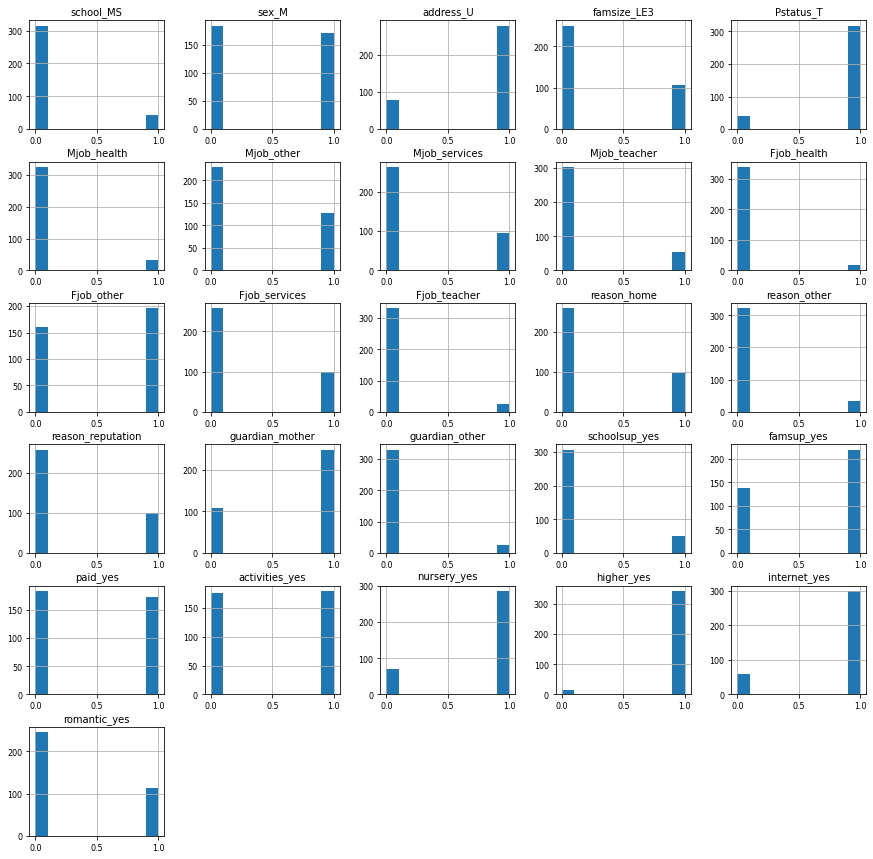

In [27]:
oSchool.df_data = None
df_feature_qual = oSchool.df_dummy
df_feature_qual

oSchool.df_data = df_feature_qual
oSchool.df_hist()

> Dataset is imbalanced regarding school.
>
> Let's check wether or not school classification influence distributions

#### Qualitative features per school.

INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with None
INFO:School:df_data: updated with dataframe shape=(315, 26)
INFO:School:
-->df_hist


(315, 26)


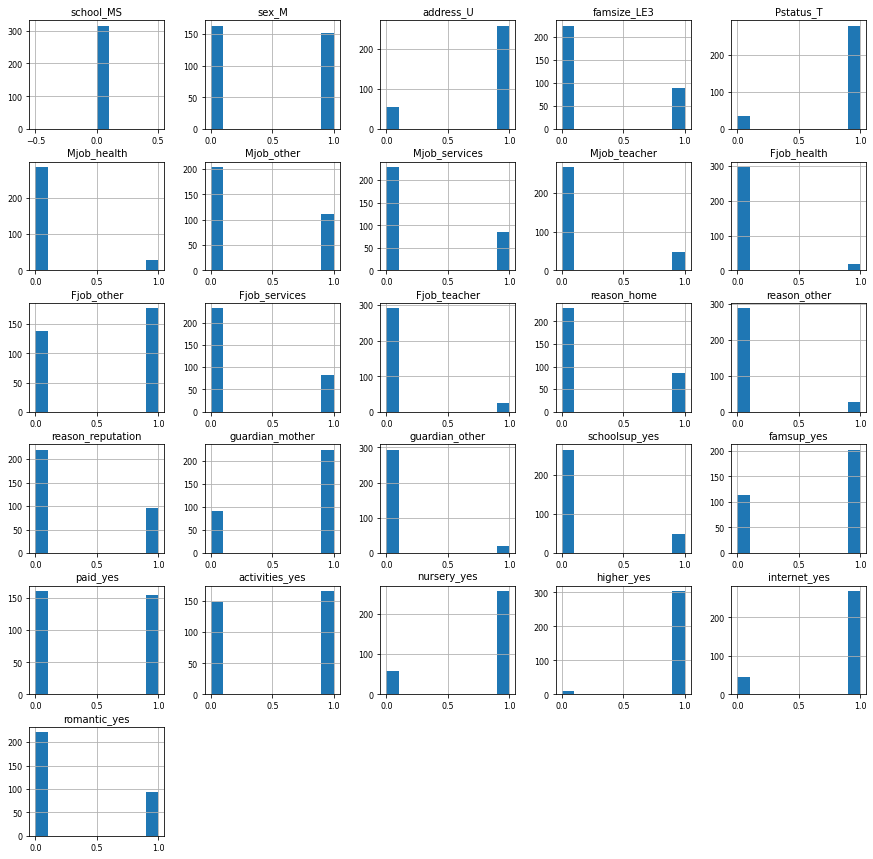

In [28]:
df_feature_qual = oSchool.df_dummy
feature = 'school_MS'
df_mask = df_feature_qual[feature]==0
oSchool.df_data = None
oSchool.df_data = df_feature_qual[df_mask]
print(oSchool.df_data.shape)
oSchool.df_hist()

#### Quantitative features

INFO:School:df_data: updated with None
INFO:School:df_data: updated with dataframe shape=(357, 13)
INFO:School:
-->df_hist


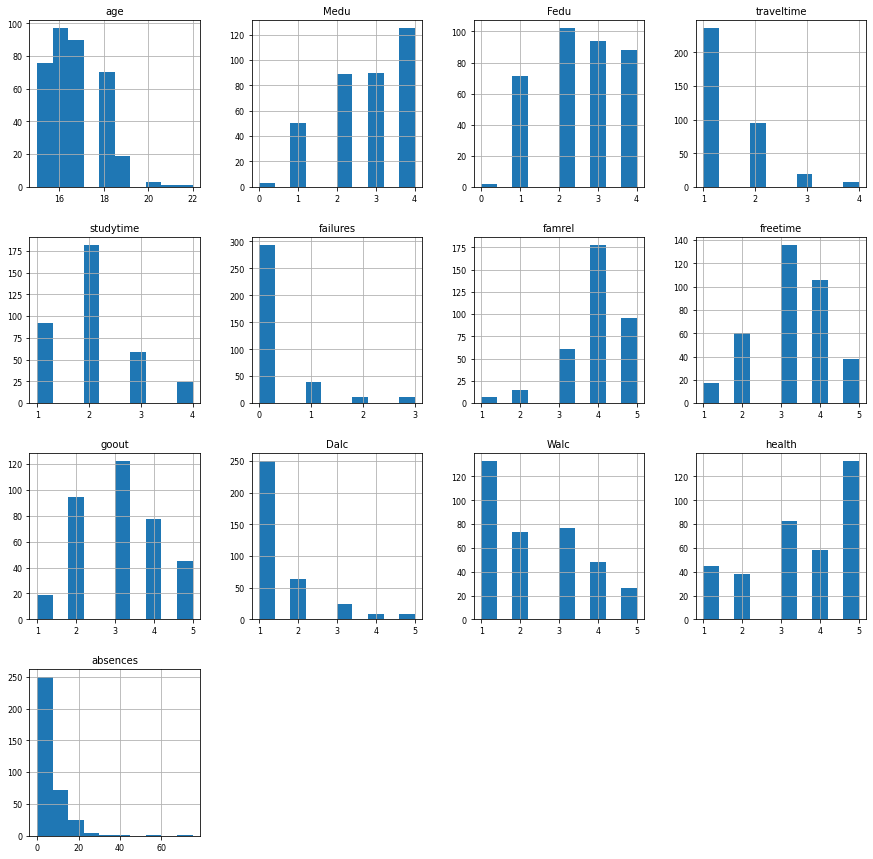

In [29]:
oSchool.df_data = None
df_feature_quant = oSchool.df_feature_quant
oSchool.df_data = df_feature_quant
oSchool.df_hist()

### Power transformation

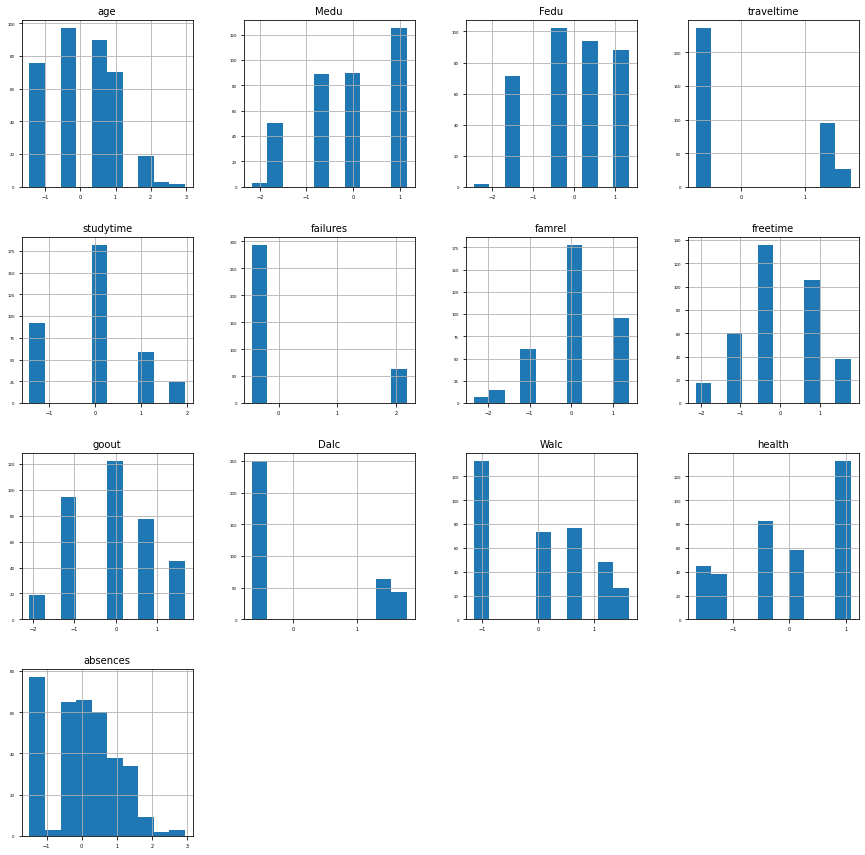

In [30]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

oPowerTransformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_power = oPowerTransformer.fit_transform(oSchool.df_feature_quant.values)
df_power = pd.DataFrame(data=X_power\
                        , index = oSchool.df_feature_quant.index\
                        , columns=oSchool.df_feature_quant.columns)
# histograms of the variables
arrAxesSubplot = df_power.hist(xlabelsize=5, ylabelsize=4, figsize=(15,15))
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

### Quantile transformation

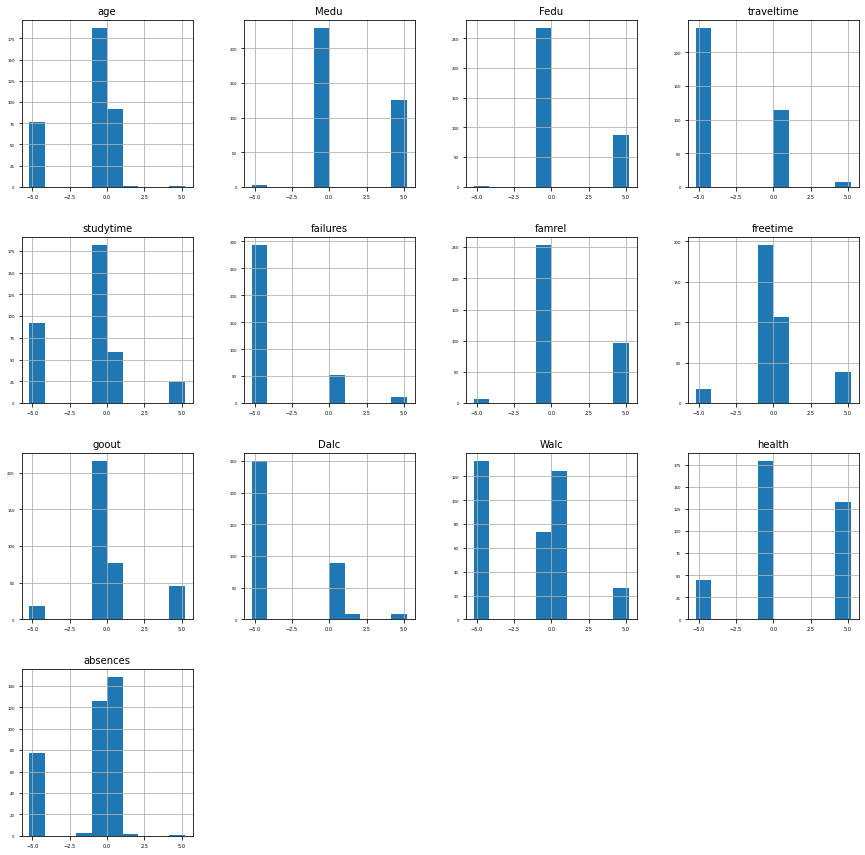

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

oQuantileTransformer = QuantileTransformer(n_quantiles=3, output_distribution= 'normal' )
X_quantf = oQuantileTransformer.fit_transform(oSchool.df_feature_quant.values)
df_quantf = pd.DataFrame(data=X_quantf\
                        , index = oSchool.df_feature_quant.index\
                        , columns=oSchool.df_feature_quant.columns)
# histograms of the variables
arrAxesSubplot = df_quantf.hist(xlabelsize=5, ylabelsize=4, figsize=(15,15))
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

### Polynomial features transformation

## Outliers detection

### Outliers over quantitative features

Nb of outliers=15
357


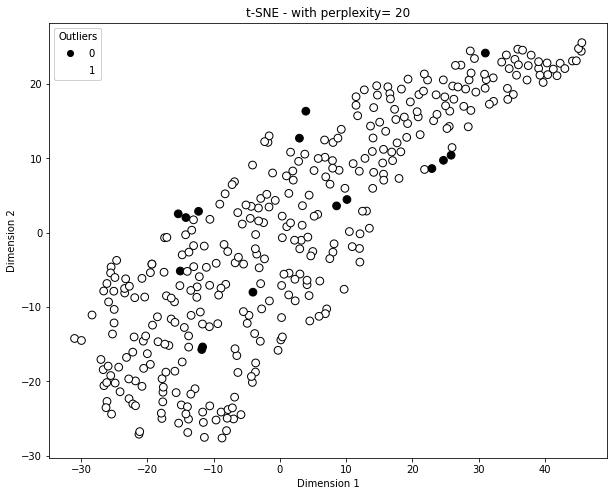

In [32]:
df_outlier_quant = df_get_outliers(  oSchool\
                                   , oSchool.df_feature_quant\
                                   , contamination=0.04\
                                   , outliername = oSchool.COL_OUTLIER_NAME\
                                   , method='isolationforest')

In [33]:
oSchool._df_data.shape

(357, 13)

In [34]:
#oSchool.df_data = None
len(oSchool.df_data), len(df_student)

(357, 357)

In [35]:
index_outlier = df_outlier_quant.index
oSchool.df_data.loc[index_outlier]

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
StudentID                                                                       
61          16     1     1           4          1         0       5         5   
66          15     4     4           1          4         0       1         3   
78          17     2     1           2          1         3       4         5   
95          15     1     1           2          4         1       3         1   
108         15     4     4           4          4         0       1         3   
127         19     0     1           1          2         3       3         4   
138         15     2     1           4          1         3       4         5   
144         18     1     1           3          1         3       5         2   
149         17     1     1           4          2         3       5         3   
225         22     3     1           1          1         3       5         4   
299         17     2     2           4          1         0       4         4   
315         18     3     2           2          1         1       2         5   
316         19     1     1           3          2         3       5         4   
352         20     2     2           1          2         2       5         5   
354         21     1     1           1          1         3       5         5   

           goout  Dalc  Walc  health  absences  
StudentID                                       
61             5     5     5       5         6  
66             3     5     5       3         4  
78             1     1     1       3         2  
95             2     1     1       1         2  
108            5     3     5       1         6  
127            2     1     1       5         2  
138            5     2     5       5         0  
144            5     1     5       4         6  
149            5     1     5       5         0  
225            5     5     5       1        16  
299            5     5     5       4         8  
315            5     5     5       5        10  
316            4     3     3       2         8  
352            4     4     5       4        11  
354            3     3     3       3         3

### Outliers over qualitative features

INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4994f70>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Nb of outliers=15
357


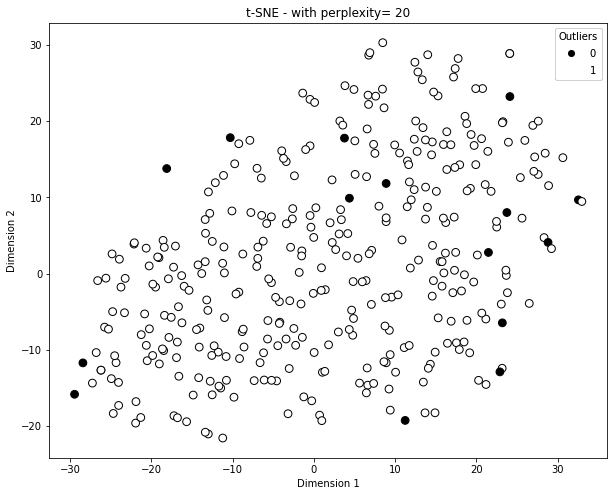

In [36]:
df_outlier_qual = df_get_outliers(oSchool\
                                   , oSchool.df_dummy\
                                  , contamination=0.04\
                                  , outliername = oSchool.COL_OUTLIER_NAME\
                                  , method='isolationforest')

In [37]:
index_outlier = df_outlier_qual.index
oSchool.df_data.loc[index_outlier]#.health.mean(), df_student.health.mean()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
7     17     4     4           2          2         0       4         1   
49    15     4     4           1          2         1       4         4   
52    15     4     2           2          1         1       5         5   
60    16     4     4           1          2         0       2         4   
89    16     4     4           1          2         0       4         1   
105   15     3     3           1          4         0       4         3   
251   18     3     2           2          2         0       4         1   
305   19     3     1           1          3         1       5         4   
323   17     3     2           2          2         0       1         2   
327   18     1     1           2          2         1       4         4   
334   18     4     4           3          2         0       3         2   
335   19     3     2           2          2         2       3         2   
336   18     1     2           3          1         0       4         3   
345   18     4     4           1          2         0       3         2   
352   20     2     2           1          2         2       5         5   

     goout  Dalc  Walc  health  absences  
7        4     1     1       1         6  
49       4     1     1       3         2  
52       5     3     4       5         6  
60       4     2     3       4         6  
89       3     3     5       5        18  
105      3     1     1       4        10  
251      1     1     1       5        75  
305      3     1     2       5        12  
323      3     1     2       5         2  
327      3     2     3       5         2  
334      2     4     2       5        10  
335      2     1     1       3         4  
336      3     2     3       3         3  
345      4     1     4       2         4  
352      4     4     5       4        11

### Outliers over all features

INFO:School:df_data: updated with None
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba47adb80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'sp

Nb of outliers=15
357


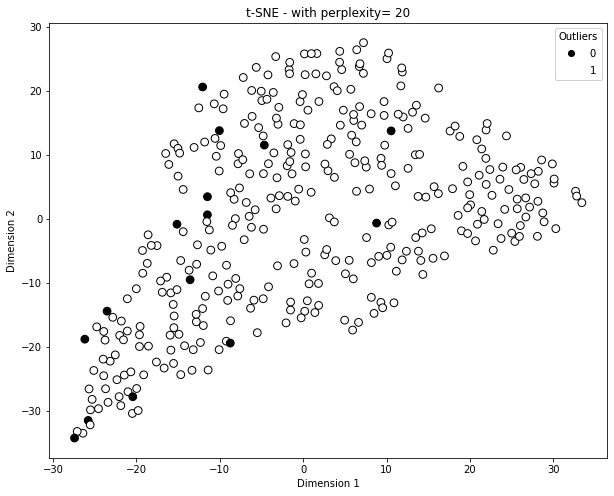

In [38]:
# Reset dataset to get original data values
oSchool.df_data = None

# Compute outliers original data values
df_outlier = df_get_outliers(oSchool\
                                  , oSchool.df_data\
                                  , contamination=0.04\
                                  , outliername = oSchool.COL_OUTLIER_NAME\
                                  , method='isolationforest')

> Outliers are represented as black points on the figure above.
>
> The outliers are mostly concentrated on the edges of the main figure formed by the "inliers", the red dots.

In [39]:
index_outlier = df_outlier.index
oSchool.df_data.loc[index_outlier]#.health.mean(), df_student.health.mean()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
52    15     4     2           2          1         1       5         5   
61    16     1     1           4          1         0       5         5   
149   17     1     1           4          2         3       5         3   
225   22     3     1           1          1         3       5         4   
251   18     3     2           2          2         0       4         1   
281   19     4     4           2          1         1       4         3   
284   19     2     1           3          2         0       3         4   
305   19     3     1           1          3         1       5         4   
316   19     1     1           3          2         3       5         4   
327   18     1     1           2          2         1       4         4   
334   18     4     4           3          2         0       3         2   
335   19     3     2           2          2         2       3         2   
341   20     4     2           2          3         2       5         4   
352   20     2     2           1          2         2       5         5   
354   21     1     1           1          1         3       5         5   

     goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
52       5     3  ...             0.0            0.0         0.0       0.0   
61       5     5  ...             0.0            1.0         1.0       0.0   
149      5     1  ...             0.0            0.0         0.0       0.0   
225      5     5  ...             0.0            0.0         0.0       0.0   
251      1     1  ...             0.0            0.0         0.0       0.0   
281      4     1  ...             1.0            0.0         1.0       1.0   
284      1     1  ...             1.0            0.0         1.0       0.0   
305      3     1  ...             1.0            0.0         0.0       1.0   
316      4     3  ...             1.0            0.0         0.0       0.0   
327      3     2  ...             0.0            0.0         0.0       0.0   
334      2     4  ...             0.0            0.0         1.0       1.0   
335      2     1  ...             1.0            0.0         0.0       0.0   
341      3     1  ...             1.0            0.0         1.0       1.0   
352      4     4  ...             1.0            0.0         1.0       1.0   
354      3     3  ...             1.0            0.0         0.0       0.0   

     activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \
52              0.0          1.0         1.0           0.0           0.0   
61              1.0          0.0         1.0           1.0           1.0   
149             1.0          1.0         0.0           0.0           1.0   
225             0.0          0.0         0.0           1.0           1.0   
251             0.0          0.0         0.0           1.0           1.0   
281             0.0          1.0         1.0           1.0           1.0   
284             0.0          1.0         0.0           1.0           1.0   
305             0.0          1.0         1.0           0.0           0.0   
316             0.0          1.0         1.0           1.0           0.0   
327             1.0          0.0         0.0           0.0           0.0   
334             0.0          0.0         1.0           1.0           1.0   
335             1.0          1.0         1.0           0.0           1.0   
341             0.0          0.0         1.0           1.0           1.0   
352             0.0          1.0         1.0           0.0           0.0   
354             0.0          0.0         1.0           0.0           0.0   

     FinalGrade  
52           10  
61           11  
149           7  
225           8  
251           9  
281           8  
284          13  
305          13  
316           8  
327          12  
334          11  
335           9  
341          15  
352           9  
354           7  

[15 rows x 40 columns]

### Outliers alignement

In [40]:
outlier_name = oSchool.COL_OUTLIER_NAME

df_outlier_alignement = pd.concat((df_outlier_quant.rename(columns={outlier_name:'quant'})\
                                   ,df_outlier_qual.rename(columns={outlier_name:'qual'})), axis=1)
print(df_outlier_alignement.isna()['quant'].value_counts())
print()
print(df_outlier_alignement.isna()['qual'].value_counts())

False    15
True     14
Name: quant, dtype: int64

False    15
True     14
Name: qual, dtype: int64


### Outliers interpretation

In [41]:
index_outlier = df_outlier.index
df_outlier = oSchool.df_student.loc[index_outlier]
display(df_outlier)
df_outlier['absences'].describe()

FirstName FamilyName school sex  age address famsize Pstatus  Medu  Fedu  \
52   Francisco   De Mello     GP   M   15       U     LE3       A     4     2   
61    Carolina    Quadros     GP   F   16       U     GT3       T     1     1   
149    Rodrigo     Miguez     GP   M   17       R     LE3       T     1     1   
225  Guilherme    Estacio     GP   M   22       U     GT3       T     3     1   
251     Camila   Carvalho     GP   F   18       R     GT3       A     3     2   
281      Dinis      Prior     GP   M   19       U     GT3       T     4     4   
284      Tiago    Mangual     GP   F   19       U     GT3       T     2     1   
305  Francisca      Ramos     GP   F   19       R     GT3       A     3     1   
316      Joana       Novo     MS   M   19       R     GT3       T     1     1   
327    Mariana       Mina     MS   M   18       R     LE3       T     1     1   
334   Madalena      Troia     MS   F   18       R     GT3       T     4     4   
335      Joana    Ramires     MS   F   19       U     LE3       T     3     2   
341   Madalena   Quintela     MS   F   20       U     GT3       T     4     2   
352      Alice  Barcellos     MS   M   20       U     LE3       A     2     2   
354   Carolina       Hiza     MS   M   21       R     GT3       T     1     1   

     ... internet romantic famrel freetime  goout  Dalc  Walc health absences  \
52   ...       no       no      5        5      5     3     4      5        6   
61   ...      yes      yes      5        5      5     5     5      5        6   
149  ...       no      yes      5        3      5     1     5      5        0   
225  ...      yes      yes      5        4      5     5     5      1       16   
251  ...      yes      yes      4        1      1     1     1      5       75   
281  ...      yes      yes      4        3      4     1     1      4       38   
284  ...      yes      yes      3        4      1     1     1      2       20   
305  ...       no       no      5        4      3     1     2      5       12   
316  ...      yes       no      5        4      4     3     3      2        8   
327  ...       no       no      4        4      3     2     3      5        2   
334  ...      yes      yes      3        2      2     4     2      5       10   
335  ...       no      yes      3        2      2     1     1      3        4   
341  ...      yes      yes      5        4      3     1     1      3        4   
352  ...       no       no      5        5      4     4     5      4       11   
354  ...       no       no      5        5      3     3     3      3        3   

    FinalGrade  
52          10  
61          11  
149          7  
225          8  
251          9  
281          8  
284         13  
305         13  
316          8  
327         12  
334         11  
335          9  
341         15  
352          9  
354          7  

[15 rows x 33 columns]

count    15.000000
mean     14.333333
std      19.252705
min       0.000000
25%       4.000000
50%       8.000000
75%      14.000000
max      75.000000
Name: absences, dtype: float64

In [42]:
oSchool.df_student['absences'].describe()

count    357.000000
mean       6.316527
std        8.187623
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

> Some outliers are due to `absences` values.

## Correlations analysis

### Pearson correlations

#### Pearson correlations with outliers

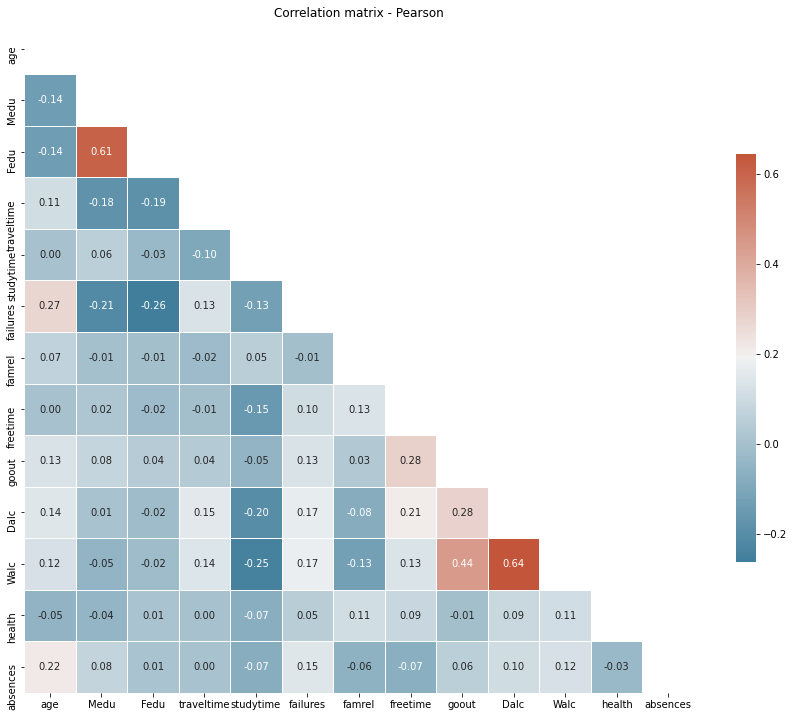

In [43]:
df_feature_quant = oSchool.df_feature[oSchool.list_feature_quantitative]
corr_matrix = df_feature_quant.corr()
corr_matrix_display(corr_matrix)

> This correlation matrix shows that there is no obvious linear relationship between `FinalGrade`, the target variable and any of the quantitative explainable feature.
>
> Nevertheless:
> - absence : correlation enforces intuition

#### Pearson correlations without outliers

> Pearson correlation is a linear method that is sensitive to outliers.
>
> Linear correlations are calculated whil eremoving the outliers and reported 

INFO:School:
-->free_outlier
INFO:School:df_data: updated with None
INFO:School:
-->df_get_outliers
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae790eca0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().s

Nb of outliers=15


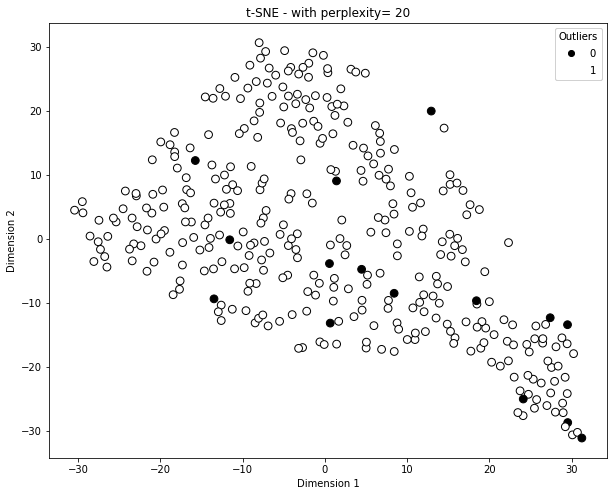

INFO:School:df_data: updated with dataframe shape=(342, 40)


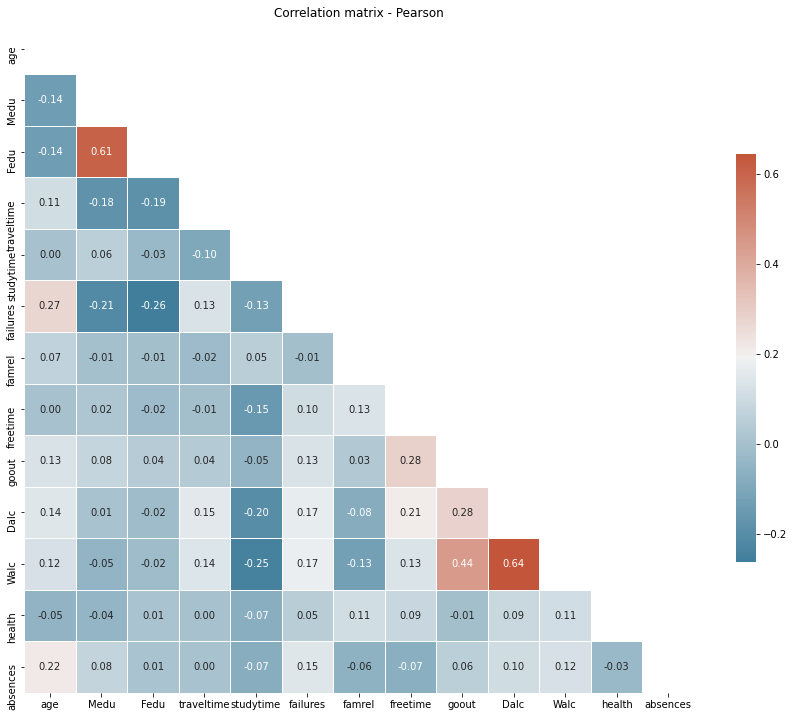

In [44]:
oSchool.free_outlier(contamination=0.04, perplexity=20)

df_feature_quant = oSchool.df_feature[oSchool.list_feature_quantitative]
corr_matrix = df_feature_quant.corr()
corr_matrix_display(corr_matrix)

> **Removing the outliers detected with `IsolationForest` method do not significantly change the correlation matrix**.
>
> The main reason is the fact that there is no linear relationship between quantitative features.

### Spearman correlations

#### Spearman correlations with outliers

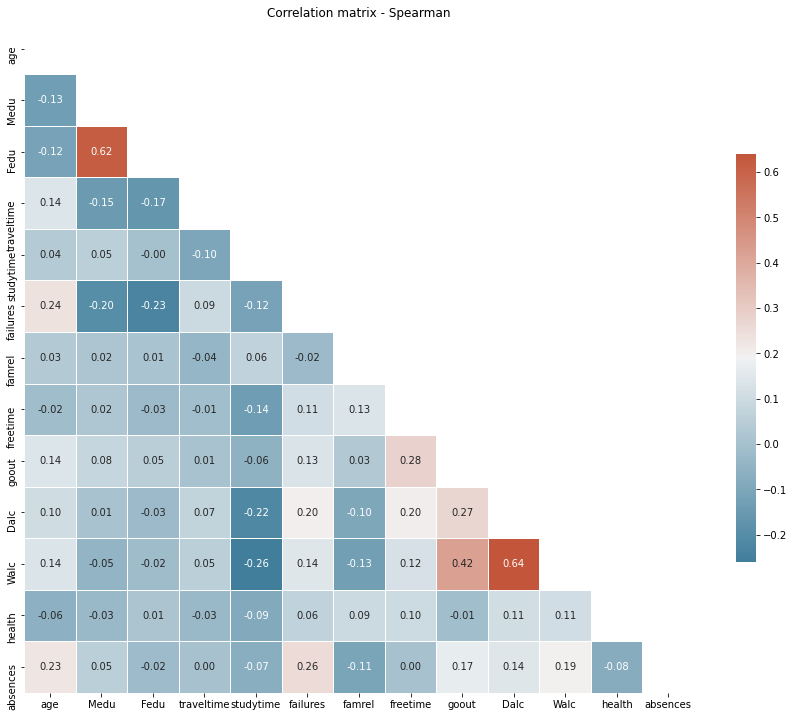

In [45]:
corr_matrix = df_feature_quant.corr(method='spearman')
corr_matrix_display(corr_matrix, method='Spearman')

#### Spearman correlations without outliers

INFO:School:
-->free_outlier
INFO:School:df_data: updated with None
INFO:School:
-->df_get_outliers
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae78b3790>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().s

Nb of outliers=15


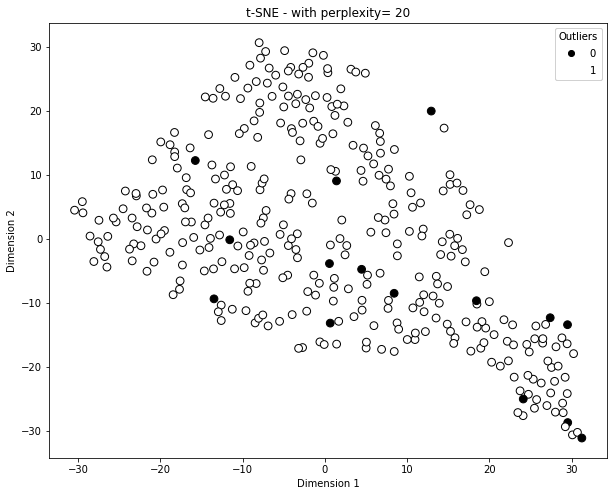

INFO:School:df_data: updated with dataframe shape=(342, 40)


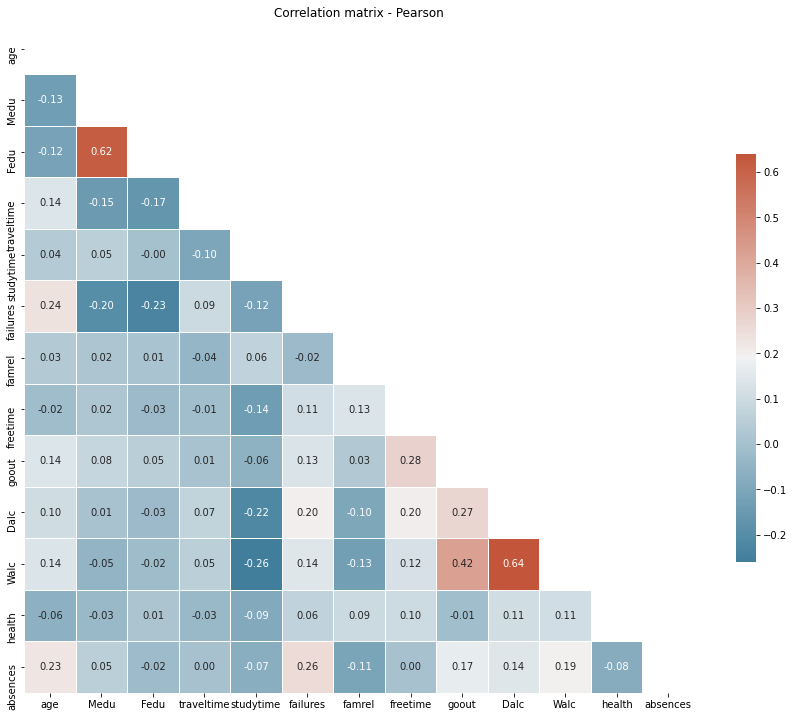

In [46]:
oSchool.free_outlier(contamination=0.04, perplexity=20)

df_feature_quant = oSchool.df_feature[oSchool.list_feature_quantitative]
corr_matrix = df_feature_quant.corr(method='spearman')
corr_matrix_display(corr_matrix)

### Kendall correlations

> Kendall correlation has less sensitivity to outliers then Pearson or Spearman

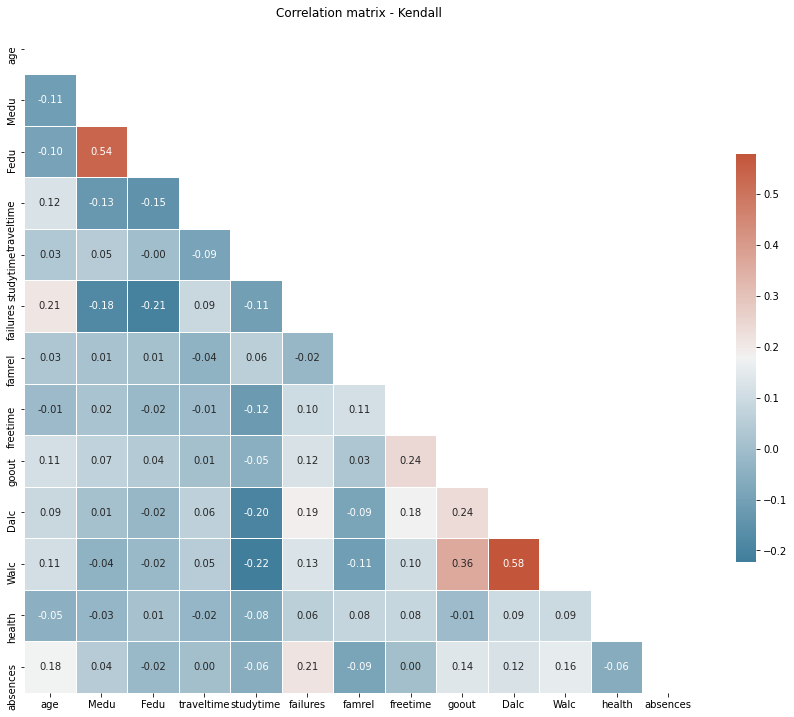

In [47]:
corr_matrix = df_feature_quant.corr(method='kendall')
corr_matrix_display(corr_matrix, method='Kendall')

### PHIk correlations

interval columns not set, guessing: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'FinalGrade']


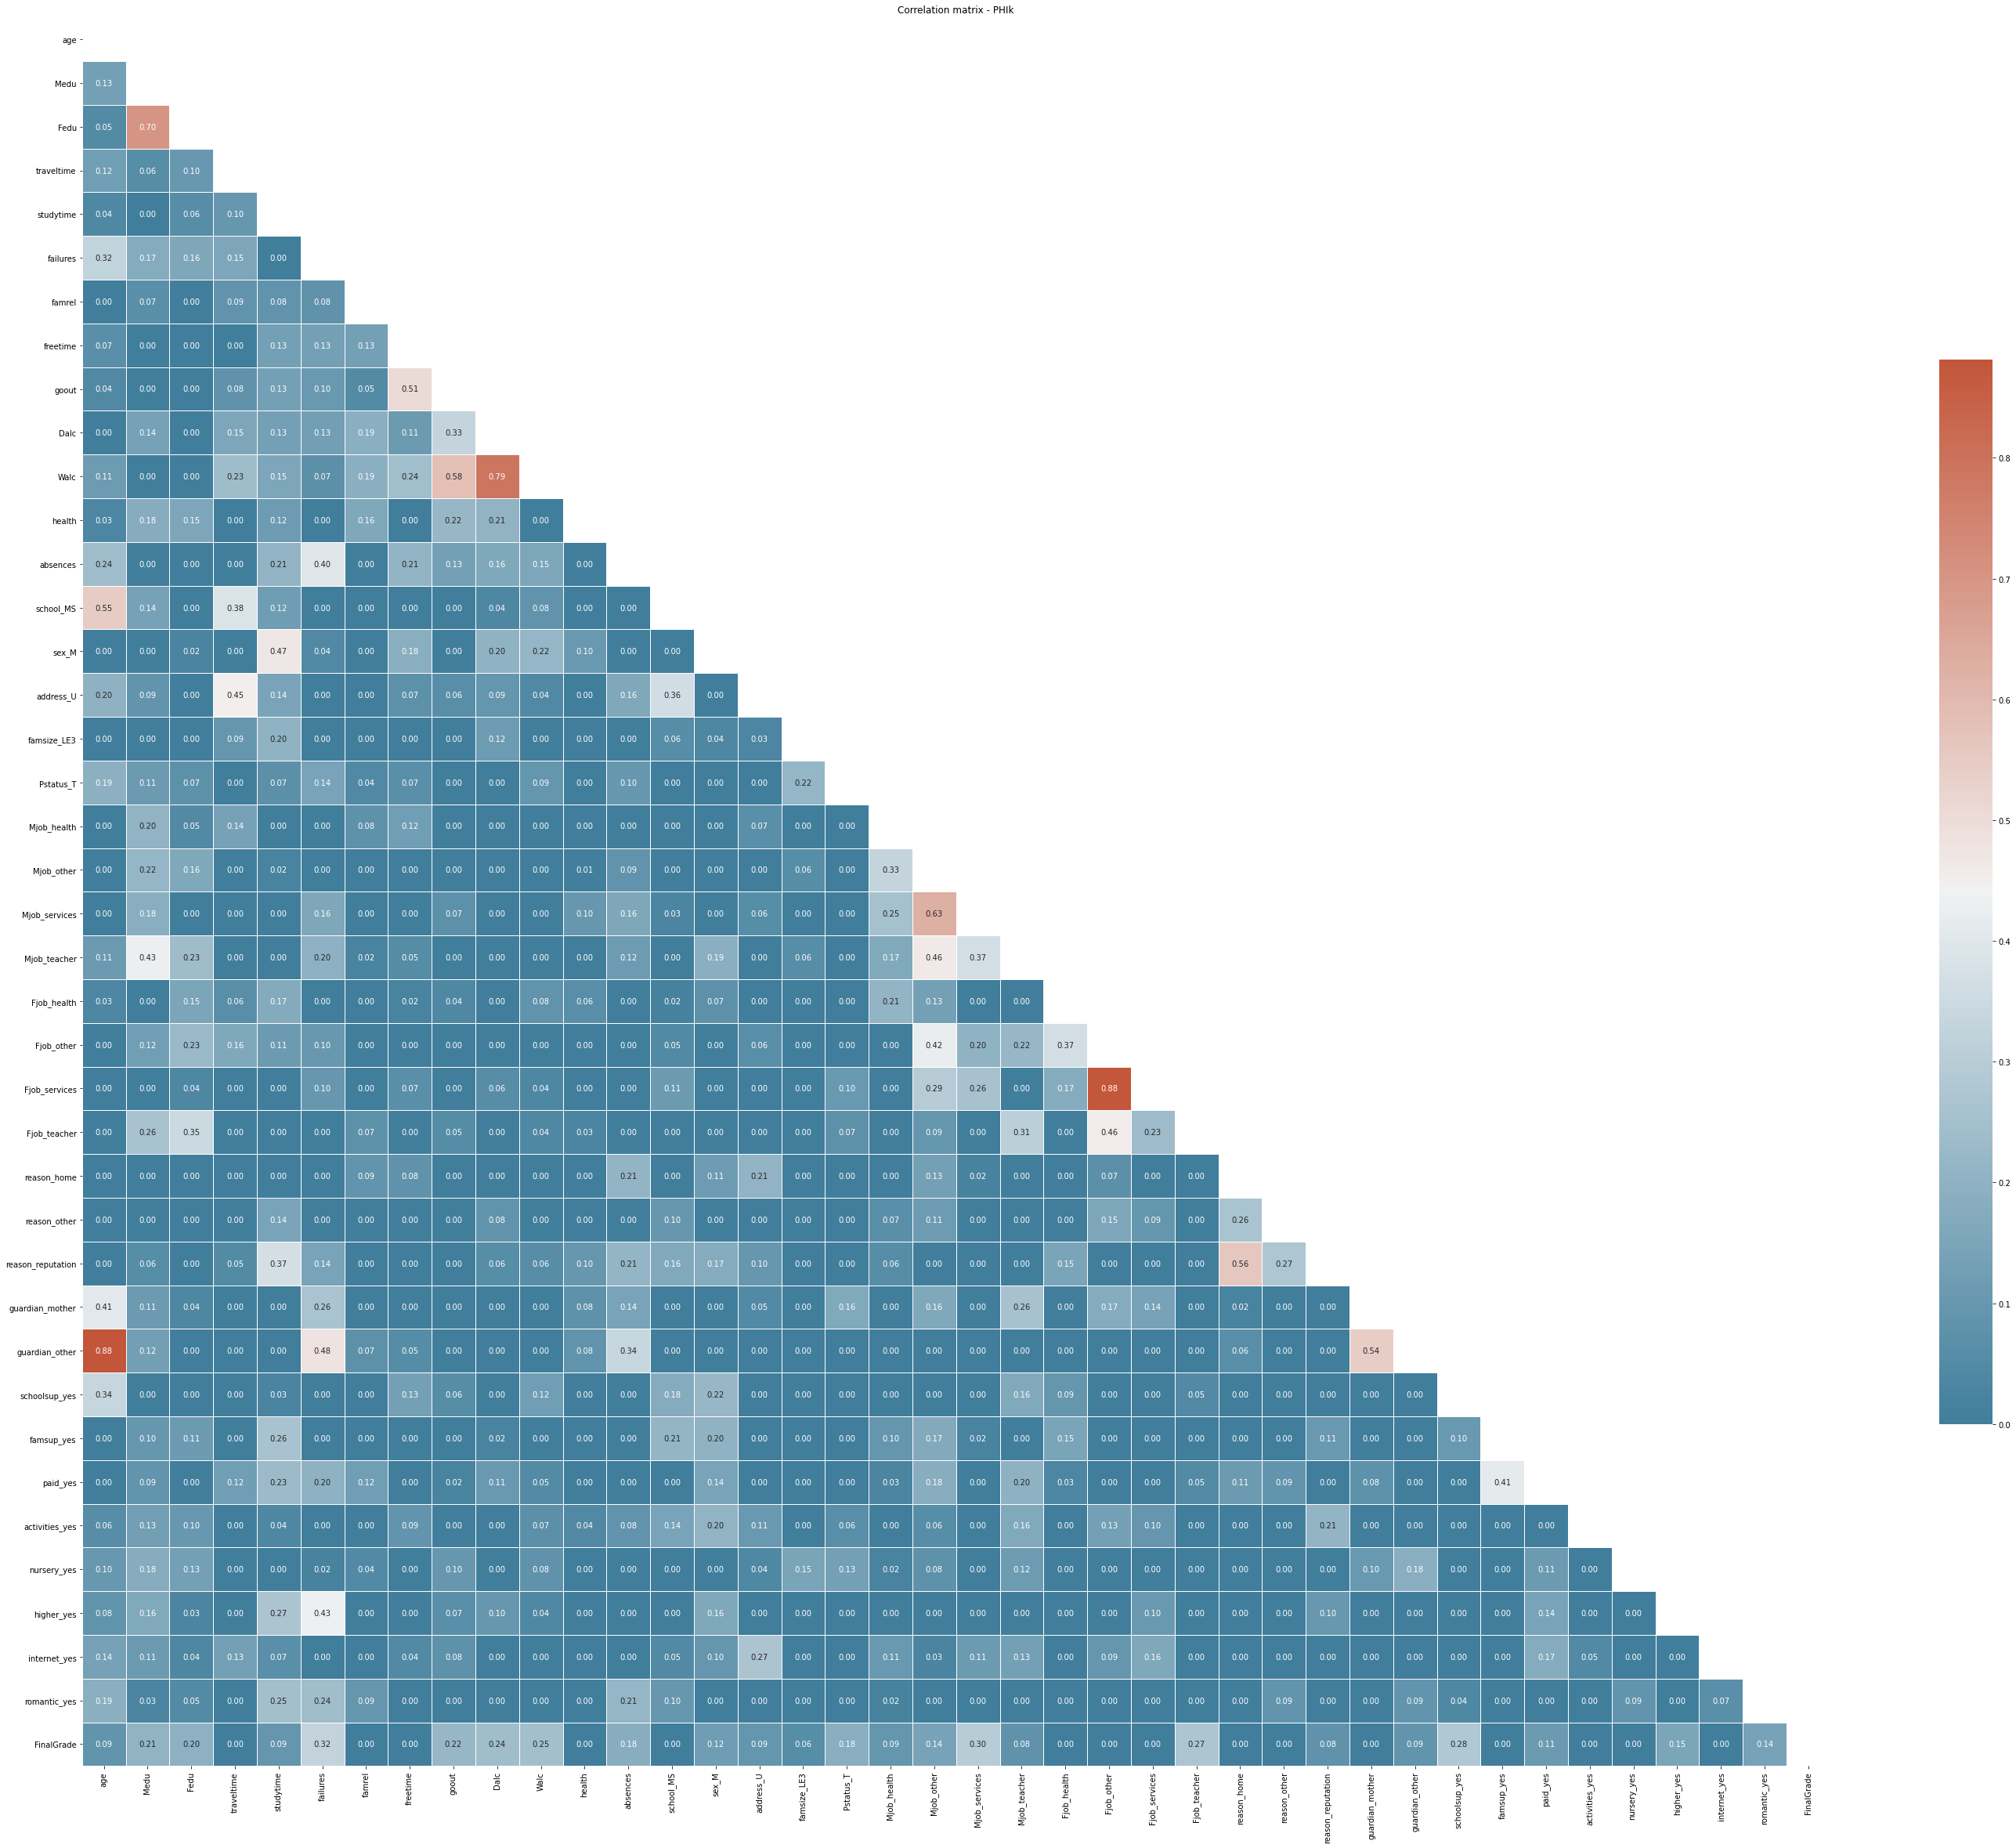

In [48]:
import phik
#df = pd.concat((oSchool.df_feature_quant, oSchool.df_feature_qual), axis=1)
corr_matrix = oSchool.df_data.phik_matrix()
corr_matrix_display(corr_matrix, method='PHIk', figsize=(50,50))

> Globaly, interactions betwen features are weak.

In [49]:
import numpy as np

THRESHOLD_COEFF = 0.4
for i in range(corr_matrix.shape[0]):
    feature_name = corr_matrix.iloc[i].index[i]
    #print(i, feature_name)
    #print()
    for j in range(i-1 ):
        colname = corr_matrix.columns[j]
        coeff = corr_matrix.iloc[i][j]
        if np.abs(coeff) >= THRESHOLD_COEFF :
            print("({} x {}) : coeff={:.2f}".format(feature_name, colname, coeff))
        
#corr_matrix[mask]

(Walc x goout) : coeff=0.58
(school_MS x age) : coeff=0.55
(sex_M x studytime) : coeff=0.47
(address_U x traveltime) : coeff=0.45
(Mjob_teacher x Medu) : coeff=0.43
(Mjob_teacher x Mjob_other) : coeff=0.46
(Fjob_other x Mjob_other) : coeff=0.42
(Fjob_teacher x Fjob_other) : coeff=0.46
(reason_reputation x reason_home) : coeff=0.56
(guardian_mother x age) : coeff=0.41
(guardian_other x age) : coeff=0.88
(guardian_other x failures) : coeff=0.48
(higher_yes x failures) : coeff=0.43


### Correlation analysis conclusions

> This analysis shows that they are nearly no correlations either linear or no linear correlations between features. This mean features does not share informations. 
>
> This fact allows to consider the use of linear models. Those lasts allow to draw linear boundaries for classes discrimination.

# Data patterns exploration

## Dimension reduction with t-SNE for binary FinalGrade 

> Check if similarities pattern take place below or above the average 

INFO:School:df_data: updated with None
INFO:School:
-->target_encode
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 40)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae7673e50>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_versio

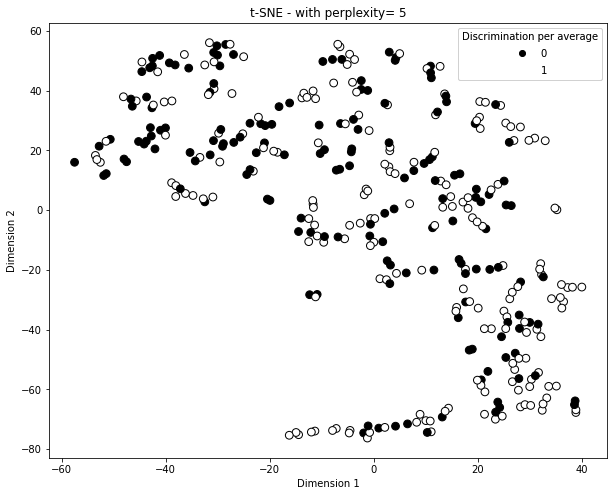

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4b07040>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


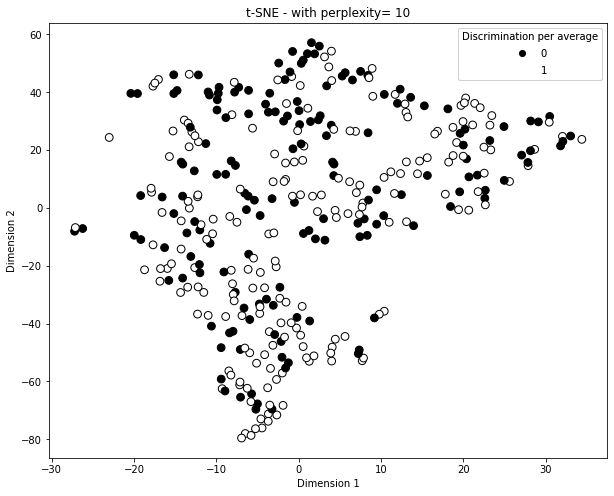

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4b07040>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


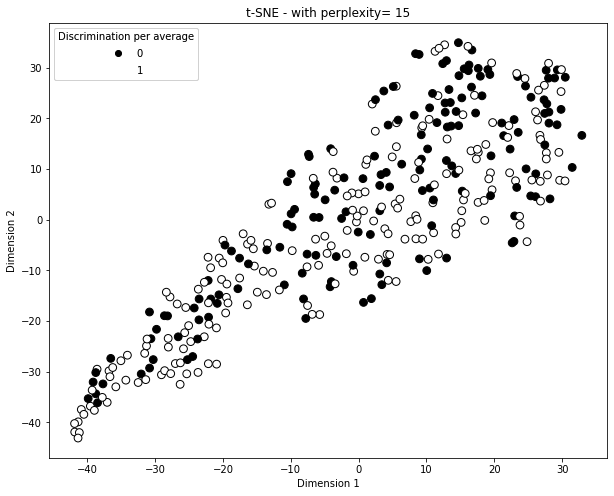

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4b07040>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


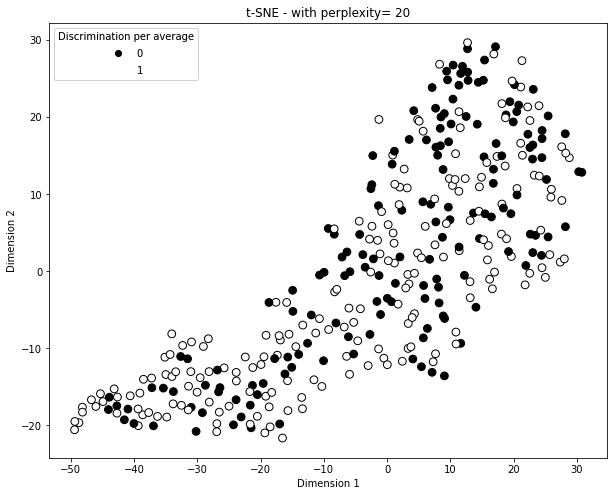

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4a31dc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


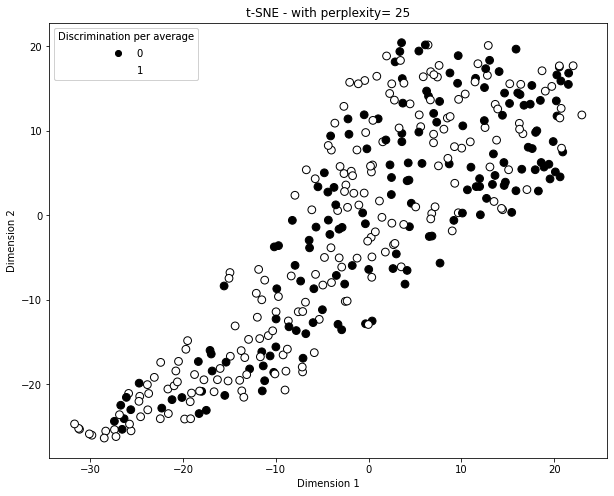

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba46c8430>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


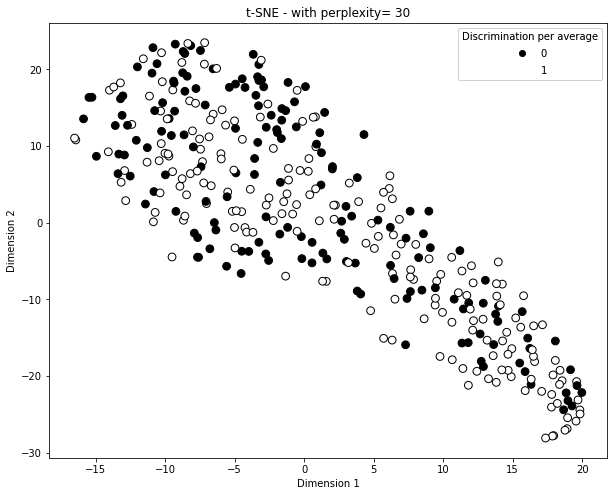

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4a31dc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


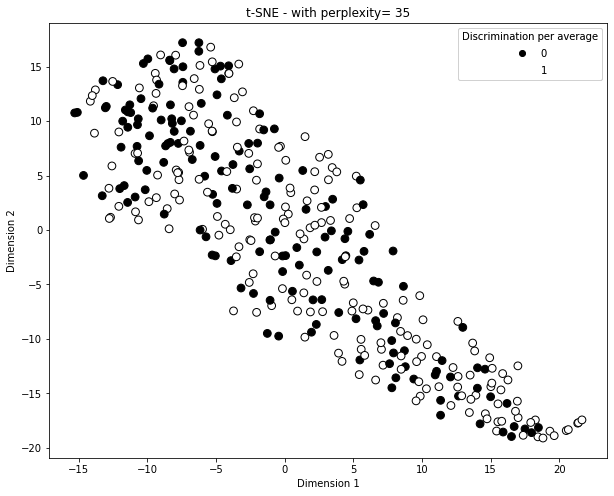

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4a31dc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


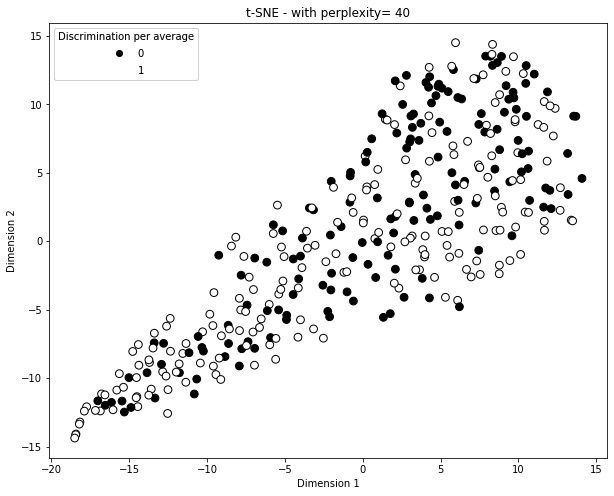

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4a31dc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


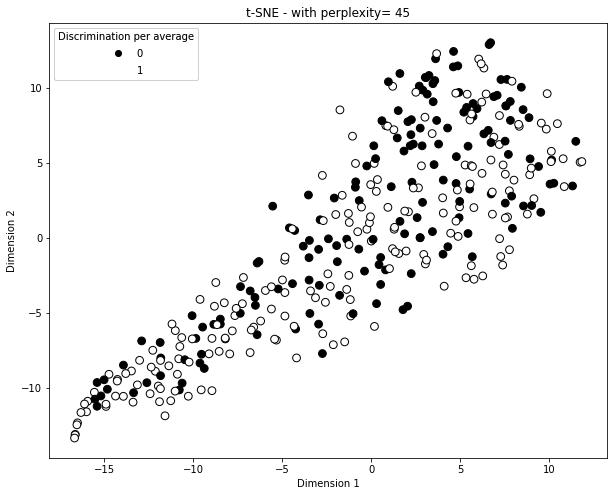

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4a31dc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


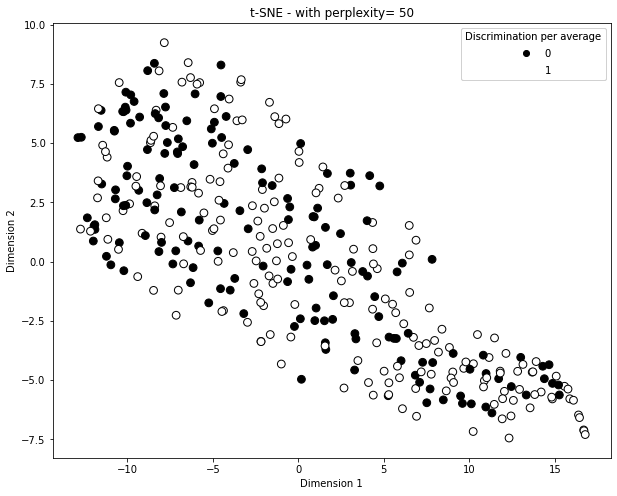

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

#-------------------------------------------------------------------------------
# Reset access to data
#-------------------------------------------------------------------------------
oSchool.df_data = None

#-------------------------------------------------------------------------------
# Encode target as binary labels
#-------------------------------------------------------------------------------
oSchool.target_encode(method='binary')

#-------------------------------------------------------------------------------
# Extract X and y 
#-------------------------------------------------------------------------------
df_y = oSchool.df_data[School.LABEL]
y = df_y.values
X = oSchool.df_data[oSchool.list_col_feature].values

#-------------------------------------------------------------------------------
# Build with black & white list of colors 
#-------------------------------------------------------------------------------
list_color = [1]*len(y)
index_0 = [index for index in df_y.index if df_y.loc[index]==0] 
for index in index_0 :
    list_color[index] =0

#-------------------------------------------------------------------------------
# Dimension reduction with t-SNE
#-------------------------------------------------------------------------------
for perplexity in range(5, 55, 5) :
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=list_color, cmap='gray', edgecolors='k', s=60)

    legend1 = plt.legend(*scatter.legend_elements(), title="Discrimination per average", loc="best")
    plt.gca().add_artist(legend1)

    plt.title("t-SNE - with perplexity= {}".format(perplexity))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

## Clustering

### Clustering with GMM & standard transformation

INFO:School:df_data: updated with None
INFO:School:
-->target_encode
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 40)
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae408c1f0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/thre

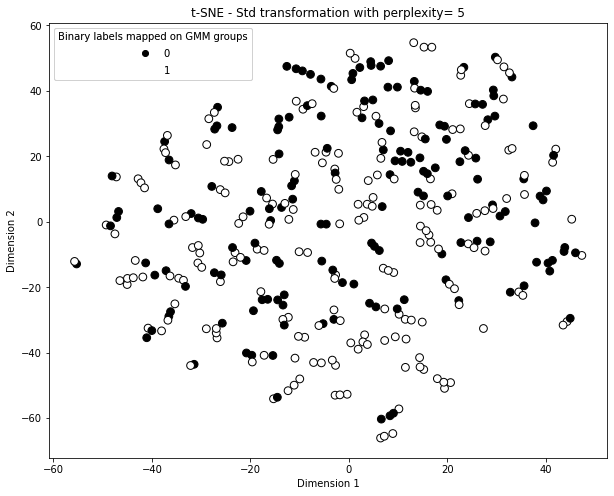

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fabf9ef7ca0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


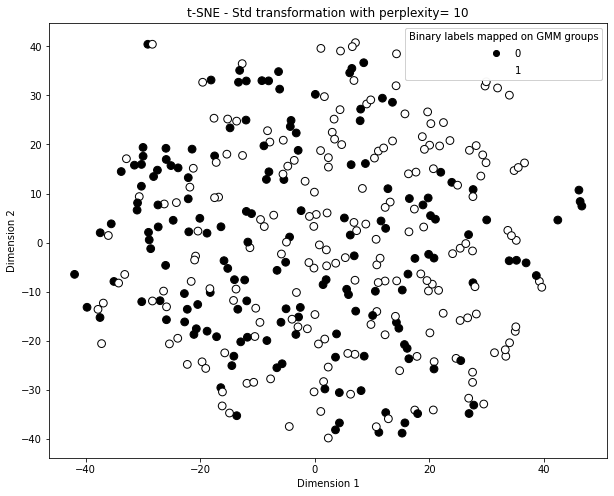

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae416b940>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


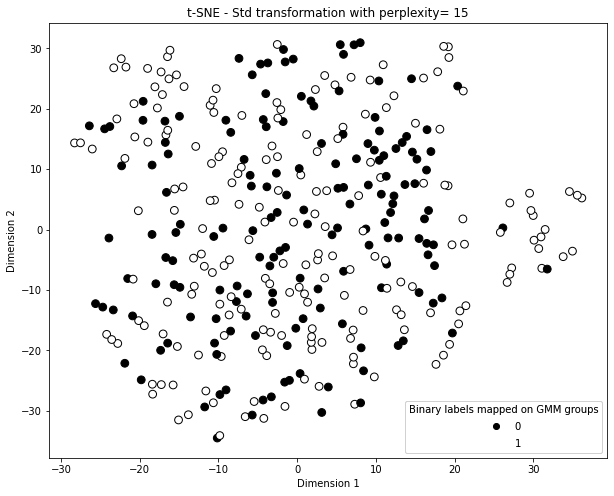

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


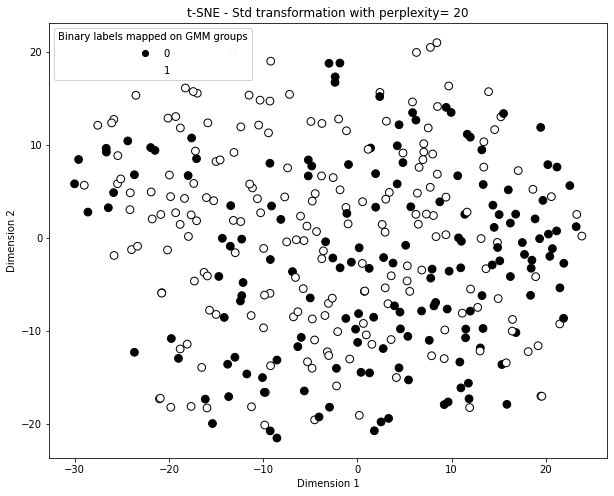

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


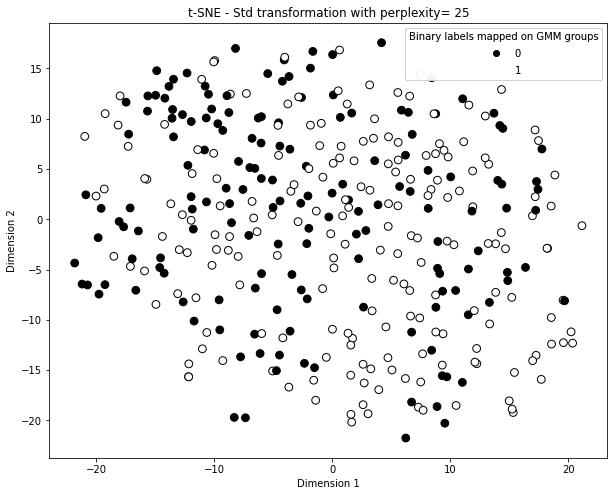

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


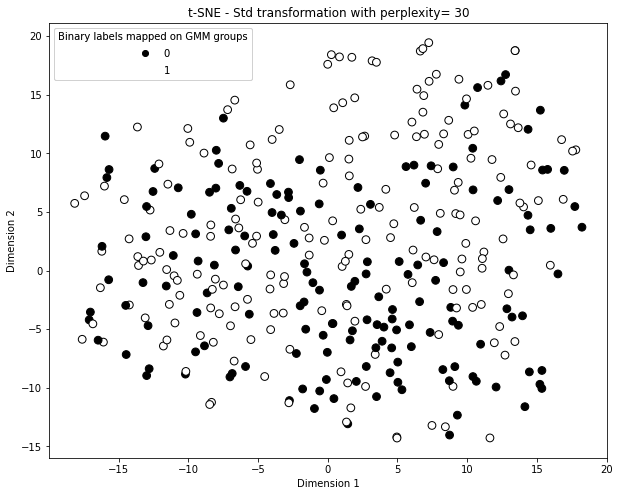

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


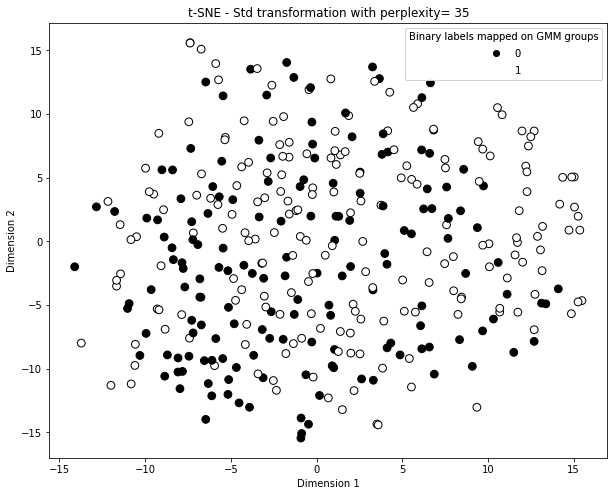

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


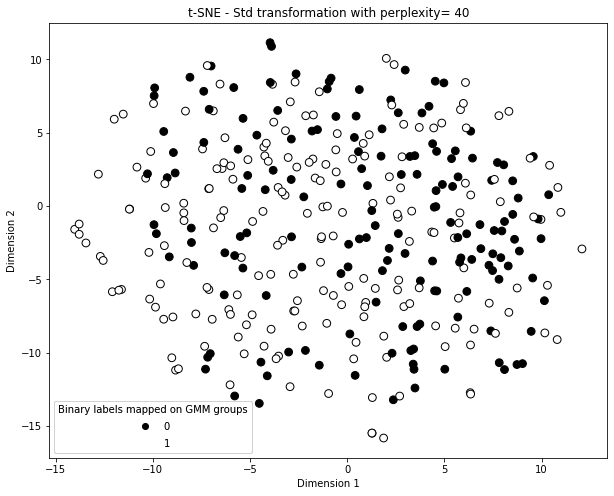

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


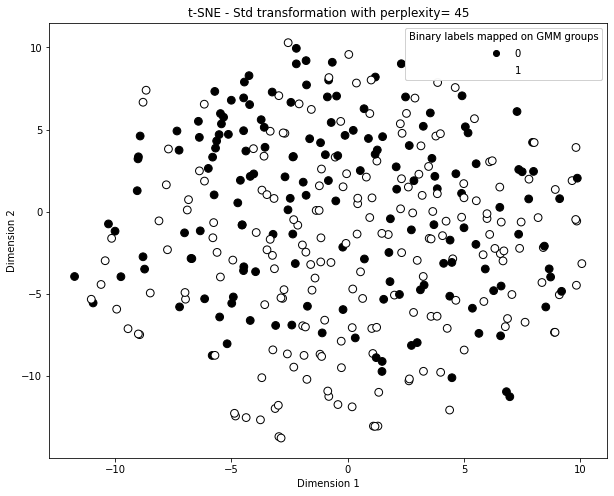

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faba4885b80>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


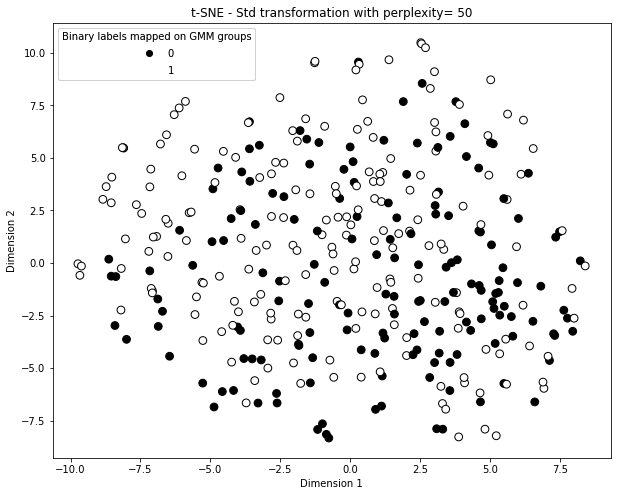

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import GaussianMixture

#-------------------------------------------------------------------------------
# Reset access to data
#-------------------------------------------------------------------------------
oSchool.df_data = None

#-------------------------------------------------------------------------------
# Encode target as binary labels
#-------------------------------------------------------------------------------
oSchool.target_encode(method='binary')

#-------------------------------------------------------------------------------
# Extract X and y 
#-------------------------------------------------------------------------------
df_y = oSchool.df_data[School.LABEL]
df_feature_quant = oSchool.df_feature_quant
df_dummy = oSchool.df_dummy

X_quant = df_feature_quant.values
y = df_y.values


#-------------------------------------------------------------------------------
# Scale quantitative features
#-------------------------------------------------------------------------------
oStandardScaler = StandardScaler()
X_scaled  = oStandardScaler.fit_transform(X_quant)
df_scaled = pd.DataFrame(data=X_scaled\
                         , index = df_feature_quant.index\
                         , columns = df_feature_quant.columns)

#-------------------------------------------------------------------------------
# Concatenate scaled quantitative and dummy features
#-------------------------------------------------------------------------------
df_data = pd.concat((df_scaled, df_dummy), axis=1)

#-------------------------------------------------------------------------------
# Apply Gaussian mixture transformation over dataset
#-------------------------------------------------------------------------------
oGaussianMixture = GaussianMixture(n_components=2, random_state=13)
oGaussianMixture.fit(df_data.values)
labels = oGaussianMixture.predict(df_data.values)

#-------------------------------------------------------------------------------
# Build with black & white list of colors 
#-------------------------------------------------------------------------------
list_color = [1]*len(y)
index_0 = [index for index in df_y.index if df_y.loc[index]==0] 
for index in index_0 :
    list_color[index] =0
    
#-------------------------------------------------------------------------------
# Apply t-SNE dimensions reduction
#-------------------------------------------------------------------------------    
for perplexity in range(5, 55, 5) :
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(df_data.values)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=list_color, cmap='gray', edgecolors='k', s=60)

    legend1 = plt.legend(*scatter.legend_elements(), title="Binary labels mapped on GMM groups", loc="best")
    plt.gca().add_artist(legend1)

    plt.title("t-SNE - Std transformation with perplexity= {}".format(perplexity))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


### Clustering with GMM & power transformation

INFO:School:df_data: updated with None
INFO:School:
-->target_encode
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 40)
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae40b7e50>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/thre

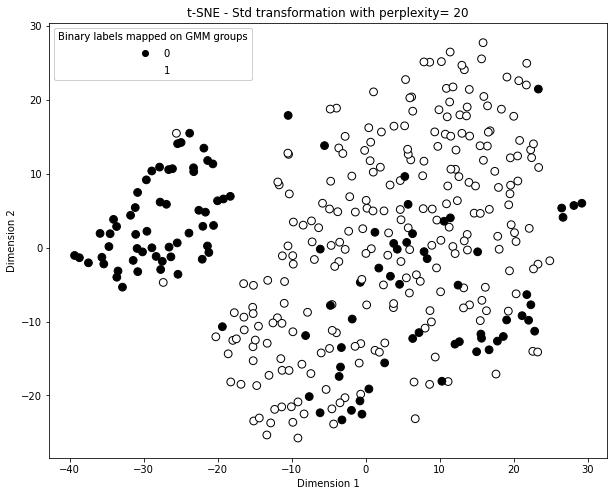

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import GaussianMixture

#-------------------------------------------------------------------------------
# Reset access to data
#-------------------------------------------------------------------------------
oSchool.df_data = None

#-------------------------------------------------------------------------------
# Encode target as binary labels
#-------------------------------------------------------------------------------
oSchool.target_encode(method='binary')

#-------------------------------------------------------------------------------
# Extract X and y 
#-------------------------------------------------------------------------------
df_y = oSchool.df_data[School.LABEL]
df_feature_quant = oSchool.df_feature_quant
df_dummy = oSchool.df_dummy

X_quant = df_feature_quant.values
y = df_y.values


#-------------------------------------------------------------------------------
# Scale quantitative features
#-------------------------------------------------------------------------------
oScaler = PowerTransformer(method='yeo-johnson')
X_scaled  = oScaler.fit_transform(X_quant)
df_scaled = pd.DataFrame(data=X_scaled\
                         , index = df_feature_quant.index\
                         , columns = df_feature_quant.columns)

#-------------------------------------------------------------------------------
# Concatenate scaled quantitative and dummy features
#-------------------------------------------------------------------------------
df_data = pd.concat((df_scaled, df_dummy), axis=1)

#-------------------------------------------------------------------------------
# Apply Gaussian mixture transformation over dataset
#-------------------------------------------------------------------------------
oGaussianMixture = GaussianMixture(n_components=2, random_state=13)
oGaussianMixture.fit(df_data.values)
labels = oGaussianMixture.predict(df_data.values)
#-------------------------------------------------------------------------------
# Build with black & white list of colors 
#-------------------------------------------------------------------------------
list_color = [1]*len(y)
index_0 = [index for index in df_y.index if df_y.loc[index]==0] 
for index in index_0 :
    list_color[index] =0
    
#-------------------------------------------------------------------------------
# Apply t-SNE dimensions reduction
#-------------------------------------------------------------------------------    
for perplexity in range(20, 25, 5) :
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(df_data.values)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='gray', edgecolors='k', s=60)

    legend1 = plt.legend(*scatter.legend_elements(), title="Binary labels mapped on GMM groups", loc="best")
    plt.gca().add_artist(legend1)

    plt.title("t-SNE - Std transformation with perplexity= {}".format(perplexity))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


### Clustering with GMM & Quantile transformation

#### Binary labeling

INFO:School:df_data: updated with None
INFO:School:
-->target_encode
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 40)
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae40b7ee0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/thre

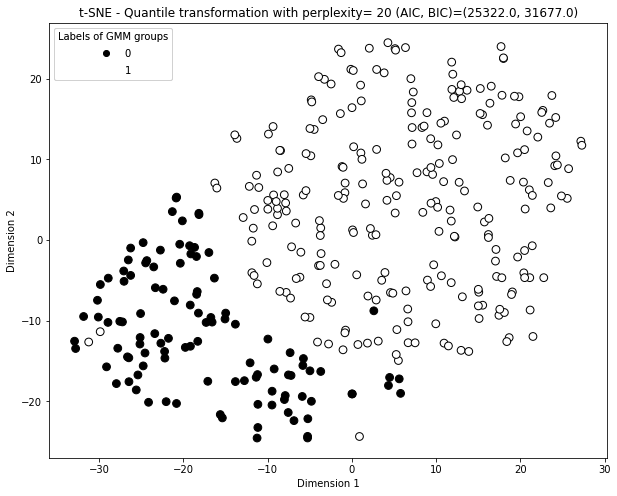

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer
from sklearn.mixture import GaussianMixture


#-------------------------------------------------------------------------------
# Reset access to data
#-------------------------------------------------------------------------------
oSchool.df_data = None

#-------------------------------------------------------------------------------
# Encode target as binary labels
#-------------------------------------------------------------------------------
oSchool.target_encode(method='binary')

#-------------------------------------------------------------------------------
# Extract X and y 
#-------------------------------------------------------------------------------
df_y = oSchool.df_data[School.LABEL]
df_feature_quant = oSchool.df_feature_quant
df_dummy = oSchool.df_dummy

X_quant = df_feature_quant.values
y = df_y.values


#-------------------------------------------------------------------------------
# Scale quantitative features
#-------------------------------------------------------------------------------
oScaler = QuantileTransformer(n_quantiles=3, output_distribution= 'normal' )
X_scaled = oScaler.fit_transform(oSchool.df_feature_quant.values)
df_scaled = pd.DataFrame(data=X_scaled\
                         , index = df_feature_quant.index\
                         , columns = df_feature_quant.columns)

#-------------------------------------------------------------------------------
# Concatenate scaled quantitative and dummy features
#-------------------------------------------------------------------------------
df_data = pd.concat((df_scaled, df_dummy), axis=1)

#-------------------------------------------------------------------------------
# Apply Gaussian mixture transformation over dataset
#-------------------------------------------------------------------------------
n_components=len(df_y.unique())
oGaussianMixture = GaussianMixture(n_components=n_components, random_state=13)
oGaussianMixture.fit(df_data.values)
labels = oGaussianMixture.predict(df_data.values)

aic = np.round(oGaussianMixture.aic(df_data.values))
bic = np.round(oGaussianMixture.bic(df_data.values))
#-------------------------------------------------------------------------------
# Apply t-SNE dimensions reduction
#-------------------------------------------------------------------------------    
for perplexity in range(20, 25, 5) :
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(df_data.values)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='gray', edgecolors='k', s=60)

    legend1 = plt.legend(*scatter.legend_elements(), title="Labels of GMM groups", loc="best")
    plt.gca().add_artist(legend1)

    plt.title("t-SNE - Quantile transformation with perplexity= {} (AIC, BIC)=({}, {})".format(perplexity, aic, bic))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


In [54]:
for label in df_y.unique():
    index_group = df_y[df_y==label].index
    count = len(index_group)
    print("Group: {} Count={} FinalGrade Average= {:.2f}"\
          .format(label, count, df_student.loc[index_group]['FinalGrade'].mean()))

Group: 1 Count=195 FinalGrade Average= 9.11
Group: 0 Count=162 FinalGrade Average= 14.43


> Binary Clusterisation matches with classes of average `FinalGrade` 

#### Multiple classes labeling

INFO:School:df_data: updated with None
INFO:School:
-->target_encode
INFO:School:
-->_df_get_dummy_feature
INFO:School:df_data: updated with dataframe shape=(357, 40)
INFO:School:
-->_df_get_dummy_feature
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7faae760edc0>
Traceback (most recent call last):
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/bangui/anaconda3/envs/python38/lib/python3.8/site-packages/thre

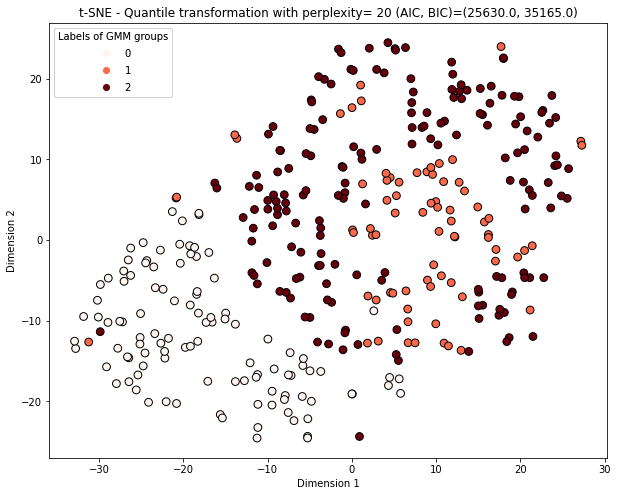

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer
from sklearn.mixture import GaussianMixture


#-------------------------------------------------------------------------------
# Reset access to data
#-------------------------------------------------------------------------------
oSchool.df_data = None

#-------------------------------------------------------------------------------
# Encode target as binary labels
#-------------------------------------------------------------------------------
oSchool.target_encode(method='three')

#-------------------------------------------------------------------------------
# Extract X and y 
#-------------------------------------------------------------------------------
df_y = oSchool.df_data[School.LABEL]
df_feature_quant = oSchool.df_feature_quant
df_dummy = oSchool.df_dummy

X_quant = df_feature_quant.values
y = df_y.values


#-------------------------------------------------------------------------------
# Scale quantitative features
#-------------------------------------------------------------------------------
oScaler = QuantileTransformer(n_quantiles=3, output_distribution= 'normal' )
X_scaled = oScaler.fit_transform(oSchool.df_feature_quant.values)
df_scaled = pd.DataFrame(data=X_scaled\
                         , index = df_feature_quant.index\
                         , columns = df_feature_quant.columns)

#-------------------------------------------------------------------------------
# Concatenate scaled quantitative and dummy features
#-------------------------------------------------------------------------------
df_data = pd.concat((df_scaled, df_dummy), axis=1)

#-------------------------------------------------------------------------------
# Apply Gaussian mixture transformation over dataset
#-------------------------------------------------------------------------------
n_components=len(df_y.unique())
oGaussianMixture = GaussianMixture(n_components=n_components, random_state=13)
oGaussianMixture.fit(df_data.values)
labels = oGaussianMixture.predict(df_data.values)

aic = np.round(oGaussianMixture.aic(df_data.values))
bic = np.round(oGaussianMixture.bic(df_data.values))
#-------------------------------------------------------------------------------
# Apply t-SNE dimensions reduction
#-------------------------------------------------------------------------------    
for perplexity in range(20, 25, 5) :
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(df_data.values)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Reds', edgecolors='k', s=60)

    legend1 = plt.legend(*scatter.legend_elements(), title="Labels of GMM groups", loc="best")
    plt.gca().add_artist(legend1)

    plt.title("t-SNE - Quantile transformation with perplexity= {} (AIC, BIC)=({}, {})".format(perplexity, aic, bic))
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


In [56]:
for label in df_y.unique():
    index_group = df_y[df_y==label].index
    count = len(index_group)
    print("Group: {} Count={} FinalGrade Average= {:.2f}"\
          .format(label, count, df_student.loc[index_group]['FinalGrade'].mean()))

Group: 2 Count=64 FinalGrade Average= 7.00
Group: 1 Count=162 FinalGrade Average= 10.50
Group: 0 Count=131 FinalGrade Average= 15.00


> 3-clusterisation matches with classes of average `FinalGrade` 

### Clustering conclusion

> The binary clusterization shows that the features space can be structured, with a quantile transformation, to correspond to two levels of final grade: final grad <=12 and final grade >12.
>
> In addition in case of binary labelization, the two classes are showned as relatively well balanced.
>
> The three labels clusterization shows more confusion for linear separability between clusters 1 (final grade average is 10.50) and 2 (final grade average is 7).
>
> For this last case, a non linear model may be require to achieve good performances for classification.

> The 2D representation of Quantile transformed dataset shows that the dataset is structured as groups that are linearly discriminable.
>
> Clusters are issued from distributions that are located in various parts of the features space showing a good separability. 

# Predictions with a linear classifier

## Linear regression applied on quantitative features

In [57]:
from sklearn.linear_model import LinearRegression
df_X = oSchool.df_feature_quant
df_y = oSchool.df_target

oLinearRegression = LinearRegression().fit(df_X.values, df_y.values.ravel())
# Display coeff and intercept
print("Intercept:", oLinearRegression.intercept_)

colName = 'coeff'
df_coeff = pd.DataFrame(data=oLinearRegression.coef_, index=df_X.columns, columns=[colName])
df_coeff.sort_values(by=colName, ascending=False, inplace=True)
display(df_coeff)

Intercept: 12.049410298585403


coeff
Medu        0.426309
studytime   0.242254
freetime    0.144117
famrel      0.092311
Fedu        0.077626
age        -0.012822
Dalc       -0.054719
Walc       -0.066811
absences   -0.068612
traveltime -0.114909
health     -0.163400
goout      -0.439889
failures   -0.923787

INFO:School:
-->_df_get_dummy_feature


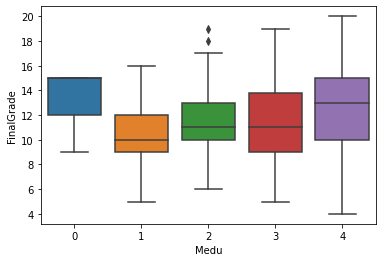

In [58]:
import seaborn as sns

df_dummy = oSchool.df_dummy
df_target= oSchool.df_target

df_feature_qual_target = pd.concat((df_X, df_target), axis=1)
feature_of_interest = df_coeff.index[0]
sns.boxplot(x=feature_of_interest, y=School.TARGET, data=df_feature_qual_target)
plt.show()

INFO:School:
-->_df_get_dummy_feature


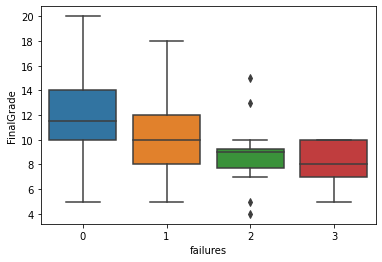

In [59]:
import seaborn as sns

df_dummy = oSchool.df_dummy
df_target= oSchool.df_target

df_feature_qual_target = pd.concat((df_X, df_target), axis=1)
feature_of_interest = df_coeff.index[-1]
sns.boxplot(x=feature_of_interest, y=School.TARGET, data=df_feature_qual_target)
plt.show()

> This result shows there is no linear relationship between independant features and the target.

## Analysis of correlations over Qualitative features

### Coefficients analysis of linear regression over qualitative features

In [60]:
df_target = oSchool.df_target
df_dummy  = oSchool.df_dummy

X = df_dummy.values
y = df_target.values.ravel()

oLinearRegression = LinearRegression().fit(X, y)
# Display coeff and intercept
print("Intercept:", oLinearRegression.intercept_)

colName = 'coeff'
df_coeff = pd.DataFrame(data=oLinearRegression.coef_, index=df_dummy.columns, columns=[colName])
df_coeff.sort_values(by=colName, ascending=False, inplace=True)
display(df_coeff)

INFO:School:
-->_df_get_dummy_feature


Intercept: 10.394224502730124


coeff
higher_yes         1.732541
Fjob_teacher       1.262400
Mjob_health        1.158646
internet_yes       0.656460
address_U          0.608503
Mjob_services      0.572500
reason_reputation  0.413139
sex_M              0.306976
activities_yes     0.274100
reason_home        0.195289
famsize_LE3        0.115748
reason_other       0.029645
guardian_mother   -0.088853
nursery_yes       -0.104882
Pstatus_T         -0.210246
paid_yes          -0.293703
Mjob_teacher      -0.298940
romantic_yes      -0.386461
Mjob_other        -0.517006
famsup_yes        -0.537867
school_MS         -0.633030
guardian_other    -0.661469
Fjob_health       -0.697429
Fjob_other        -0.872431
Fjob_services     -0.949588
schoolsup_yes     -2.412731

> The mode value `no` from feature `schoolsup` shows a tendency that when no extra educational support 
is provided better is the final grade.
>
> Interpretation may be that better a student is the less extra support is needed.
>
> Note that `schoolsup` is an actionable variable while `Mjob` is not.

INFO:School:
-->_df_get_dummy_feature


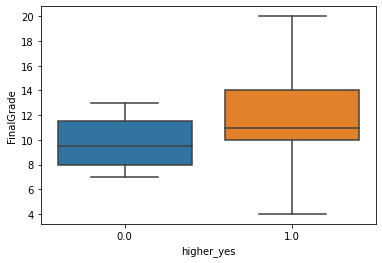

In [61]:
import seaborn as sns

df_dummy = oSchool.df_dummy
df_target= oSchool.df_target

df_feature_qual_target = pd.concat((df_dummy, df_target), axis=1)
feature_of_interest = df_coeff.index[0]
sns.boxplot(x=feature_of_interest, y=School.TARGET, data=df_feature_qual_target)
plt.show()

INFO:School:
-->_df_get_dummy_feature


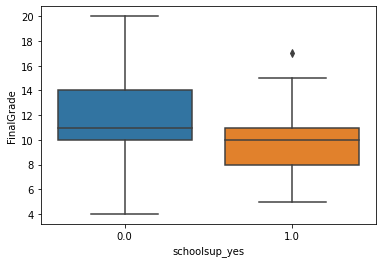

In [62]:
import seaborn as sns

df_dummy = oSchool.df_dummy
df_target= oSchool.df_target

df_feature_qual_target = pd.concat((df_dummy, df_target), axis=1)
feature_of_interest = df_coeff.index[-1]
sns.boxplot(x=feature_of_interest, y=School.TARGET, data=df_feature_qual_target)
plt.show()

# Predictions with regressors

## Linear regression

### No data tansformation

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regr = regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)
print("Intercept:", regr.intercept_)

colName = 'coeff'
df_coeff = pd.DataFrame(data=regr.coef_, index=df_X_test.columns, columns=[colName])
df_coeff.sort_values(by=colName, ascending=False, inplace=True)
display(df_coeff)    

INFO:School:df_data: updated with None
INFO:School:
-->get_scaled_train_test
INFO:School:
-->_df_get_dummy_feature
DEBUG:School:get_scaled_train_test list_col_quant=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
DEBUG:School:get_scaled_train_test list_col_qual =['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']
INFO:School:
-->_df_get_dummy_feature
DEBUG:School:get_scaled_train_test df_data.columns=Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### No data tansformation no outliers

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from core.scaler import IdentityScaler

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.free_outlier(contamination=1.e-2, perplexity=20)
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
oBestRegressor = regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

In [ ]:
colName = 'coeff'
df_coeff = pd.DataFrame(data=oBestRegressor.coef_, index=df_X_test.columns, columns=[colName])
df_coeff.sort_values(by=colName, ascending=False, inplace=True)
display(df_coeff)        

### Standard scaler transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test\
=  oSchool.get_scaled_train_test(scaler=StandardScaler)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### MinMax scaler transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=MinMaxScaler)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### Power scaler transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from core.scaler import IdentityScaler

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=PowerTransformer)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### Quantile transformation

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
dict_quantileTransformer = {'n_quantiles':3, 'output_distribution':'normal'}
df_X_train, df_y_train, df_X_test, df_y_test \
=  oSchool.get_scaled_train_test(scaler=QuantileTransformer, dict_scaler=dict_quantileTransformer)

oLinearRegression = LinearRegression()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict()\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

## Huber regression ability of prediction

### No data ttransformation

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)
dict_param_grid={'alpha':[ 2., 5., 10., 100., 1000.], 'max_iter':[2000]}
oLinearRegression = HuberRegressor()

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oLinearRegression\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

## SVR 

### SVR no transformation

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oSVR = SVR()
dict_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1.e-3, 5.e-3, 0.01, 0.05, 0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oSVR\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### SVR no transformation no outlier

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oSVR = SVR()
dict_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1.e-3, 5.e-3, 0.01, 0.05, 0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oSVR\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### SVR MinMax transformation

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=MinMaxScaler)

oSVR = SVR()
dict_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 1.e2, 1.e3],
    'gamma': ['scale', 'auto', 0.1, 1]
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oSVR\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### SVR standard transformation

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=StandardScaler)

oSVR = SVR()
dict_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 1.e2, 1.e3],
    'gamma': ['scale', 'auto', 0.1, 1]
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oSVR\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### SVR PowerTransform transformation

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data=None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=PowerTransformer)

oSVR = SVR()
dict_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 5, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oSVR\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

## Decision tree

> This algorithm tends to overfit.
>
> This is of minor importance because the goal is to discover which are the coefficients for this dataset that has a positive or a negative influence over final grade.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test()

oDecisionTreeRegressor = DecisionTreeRegressor(random_state=13)

dict_param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
oStratifiedKFold = StratifiedKFold(n_splits=3\
                                       , shuffle=True\
                                       , random_state=13)
oGridSearchCV = GridSearchCV(oDecisionTreeRegressor\
                             , dict_param_grid, scoring='neg_mean_squared_error'\
                             , cv=oStratifiedKFold, verbose=1)

oGridSearchCV.fit(df_X_train.values, df_y_train.values)

# Bests parameters
print("Meilleurs paramètres :")
print(oGridSearchCV.best_params_)

# Instantiate the best model 
oBestRgressor = oGridSearchCV.best_estimator_
y_pred = oBestRgressor.predict(df_X_test.values)

#  Scoring the best model
y_test = df_y_test.values.ravel()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE over test dataset :", mse)
print("R-squared:", r2)

df_test_pred = pd.DataFrame(data={'true':y_test, 'pred':y_pred}, index = df_y_test.index)
import matplotlib.pyplot as plt
# histograms of the variables
arrAxesSubplot = df_test_pred.hist(xlabelsize=8, ylabelsize=8, figsize=(15,10), bins=10)
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV


df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=StandardScaler)

oDecisionTreeRegressor = DecisionTreeRegressor(random_state=13)

dict_param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
oStratifiedKFold = StratifiedKFold(n_splits=3\
                                       , shuffle=True\
                                       , random_state=13)

oGridSearchCV = GridSearchCV(oDecisionTreeRegressor\
                             , dict_param_grid, scoring='neg_mean_squared_error'\
                             , cv=oStratifiedKFold, verbose=1)

oGridSearchCV.fit(df_X_train.values, df_y_train.values)

# Bests parameters
print("Meilleurs paramètres :")
print(oGridSearchCV.best_params_)

# Instantiate the best model 
oBestRgressor = oGridSearchCV.best_estimator_
y_pred = oBestRgressor.predict(df_X_test.values)

#  Scoring the best model
y_test = df_y_test.values.ravel()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE over test dataset :", mse)
print("R-squared:", r2)

df_test_pred = pd.DataFrame(data={'true':y_test, 'pred':y_pred}, index = df_y_test.index)
import matplotlib.pyplot as plt
# histograms of the variables
arrAxesSubplot = df_test_pred.hist(xlabelsize=8, ylabelsize=8, figsize=(15,10), bins=10)
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV


df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=MinMaxScaler)

oDecisionTreeRegressor = DecisionTreeRegressor(random_state=13)

dict_param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

oStratifiedKFold = StratifiedKFold(n_splits=3\
                                       , shuffle=True\
                                       , random_state=13)

oGridSearchCV = GridSearchCV(oDecisionTreeRegressor\
                             , dict_param_grid, scoring='neg_mean_squared_error'\
                             , cv=oStratifiedKFold, verbose=1)

oGridSearchCV.fit(df_X_train.values, df_y_train.values)

# Bests parameters
print("Meilleurs paramètres :")
print(oGridSearchCV.best_params_)

# Instantiate the best model 
oBestRgressor = oGridSearchCV.best_estimator_
y_pred = oBestRgressor.predict(df_X_test.values)

#  Scoring the best model
y_test = df_y_test.values.ravel()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE over test dataset :", mse)
print("R-squared:", r2)

df_test_pred = pd.DataFrame(data={'true':y_test, 'pred':y_pred}, index = df_y_test.index)
# histograms of the variables
arrAxesSubplot = df_test_pred.hist(xlabelsize=8, ylabelsize=8, figsize=(15,10), bins=10)
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer


df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=PowerTransformer)

oDecisionTreeRegressor = DecisionTreeRegressor(random_state=13)

dict_param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}
oStratifiedKFold = StratifiedKFold(n_splits=3\
                                       , shuffle=True\
                                       , random_state=13)

oGridSearchCV = GridSearchCV(oDecisionTreeRegressor\
                             , dict_param_grid, scoring='neg_mean_squared_error'\
                             , cv=oStratifiedKFold, verbose=1)

oGridSearchCV.fit(df_X_train.values, df_y_train.values)

# Bests parameters
print("Meilleurs paramètres :")
print(oGridSearchCV.best_params_)

# Instantiate the best model 
oBestRgressor = oGridSearchCV.best_estimator_
y_pred = oBestRgressor.predict(df_X_test.values)

#  Scoring the best model
y_test = df_y_test.values.ravel()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE over test dataset :", mse)
print("R-squared:", r2)

df_test_pred = pd.DataFrame(data={'true':y_test, 'pred':y_pred}, index = df_y_test.index)
# histograms of the variables
arrAxesSubplot = df_test_pred.hist(xlabelsize=8, ylabelsize=8, figsize=(15,10), bins=10)
[oAxesSubplot.title.set_size(10) for oAxesSubplot in arrAxesSubplot.ravel()]
plt.show()

## RandomForest

### RandomForest no transformation

In [ ]:
oSchool.df_data = None
oSchool.df_data.shape

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(oSchool.df_data.shape)
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)
oRandomForestRegressor = RandomForestRegressor(random_state=13)
dict_param_grid = {
    'n_estimators': [125,150, 175],
    'max_depth': [1, 2, 4, 6, 8, 10],
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oRandomForestRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### RandomForest no transformation no outliers

In [ ]:
df_outlier = oSchool.df_get_outliers(contamination=0.04)

In [ ]:
df_outlier

In [ ]:
index_inlier = [index for index in oSchool.df_data.index if index not in df_outlier.index]
df_free_outlier = oSchool.df_data.loc[index_inlier]
oSchool.df_data = df_free_outlier
print(oSchool.df_data.shape)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oRandomForestRegressor = RandomForestRegressor(random_state=13)

dict_param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [1, 2, 4, 6, 8, 10],
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oRandomForestRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### RandomForest MinMax transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

oSchool.df_data = None
df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=MinMaxScaler)

oRandomForestRegressor = RandomForestRegressor(random_state=13)
dict_param_grid = {
    'n_estimators': [ 50, 150, 200, 250],
    'max_depth': [1, 2, 4, 6, 8, 10],
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oRandomForestRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### RandomForest Standard transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

oSchool.df_data = None

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=StandardScaler)

oRandomForestRegressor = RandomForestRegressor(random_state=13)
dict_param_grid = {
    'n_estimators': [ 50, 150, 200, 250],
    'max_depth': [1, 2, 4, 6, 8, 10],
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oRandomForestRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### RandomForest PowerTransform transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

oSchool.df_data = None

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=PowerTransformer)

oRandomForestRegressor = RandomForestRegressor(random_state=13)
dict_param_grid = {
    'n_estimators': [ 50, 150, 200, 250],
    'max_depth': [1, 2, 4, 6, 8, 10],
}

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oRandomForestRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

## XGBoost

### XGBoost no transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

oSchool.df_data = None

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)


dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}

oXGBRegressor = xgboost.XGBRegressor(random_state=13)

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### XGBoost with no transformation no outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

oSchool.free_outlier(contamination=0.04, perplexity=20)

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=IdentityScaler)

oXGBRegressor = xgboost.XGBRegressor(random_state=0)

dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}
dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### XGBoost with MinMax transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=MinMaxScaler)

oSchool.df_data = None

dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}

oXGBRegressor = xgboost.XGBRegressor(random_state=13)

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### XGBoost with Standard transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=StandardScaler)

oSchool.df_data = None

dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}

oXGBRegressor = xgboost.XGBRegressor(random_state=13)

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### XGBoost with PowerTransform transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

df_X_train, df_y_train, df_X_test, df_y_test =  oSchool.get_scaled_train_test(scaler=StandardScaler)

oSchool.df_data = None

dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}

oXGBRegressor = xgboost.XGBRegressor(random_state=13)

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

### XGBoost with Quantile transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost

dict_quantileTransformer = {'n_quantiles':3, 'output_distribution':'normal'}
oSchool.df_data = None
df_X_train, df_y_train, df_X_test, df_y_test \
=  oSchool.get_scaled_train_test(scaler=QuantileTransformer, dict_scaler=dict_quantileTransformer)


dict_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 4, 6, 8, 10],
}

oXGBRegressor = xgboost.XGBRegressor(random_state=13)

dist_histogram = {'xlabelsize':8, 'ylabelsize':8, 'figsize':(15,10), 'bins':10}
regressor_grid_crossval( oXGBRegressor\
                        , df_X_train\
                        , df_y_train\
                        , df_X_test\
                        , df_y_test\
                        , dict_param_grid=dict_param_grid\
                        , is_displayed=True)
                        #, dict_hist_display=dist_histogram)

## Regressions conclusion

> The weakness of the results may be explained by:
> - the lack of records; this number may be insufficient in order to capture patterns and interactions into the dataset leading to correct predictions.
> - the noise in observations; some features may be accurate while those based on students declarations may be biaised or the way teachers assign levels may inhomoneous. This last fact require more informations, more features in order models to achieve good performances.
> - the way data have been collected and transcripted may have been to introduce errors in dataset. 
> - the ability to predict the level grade based on student behavior or social informations may be not founded.

# Predictions with a linear classifier

In [ ]:
oSchool.target_encode()
_ = oSchool._df_label.hist(legend=False)

print()
for a, b in zip([0,1],oSchool._oLabelEncoder.inverse_transform([0,1])):
    print("\t{} -> {}".format(a,b))

> Histogram shows that classes are balanced for LevelGrade classified as below and above the average.

## LogisticRegression with `LevelGrade` labelization

> In order to decrease the class granularity ranging from 0 to 20, a new classification takes place with 2 or 3 levels.

### Binary classification

In [ ]:
del(oSchool)
oSchool = School(df_student)

#### Binary labelization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data = None

oSchool.target_encode()

In [ ]:
oSchool.df_label

#### Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [ 0.1, 1, 10, 20, 100],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}
oSchool.get_best_classifier(  StandardScaler\
                            , dict()\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , dict_calibration = None\
                            , perplexity=25\
                            , dict_reduction=None
                            , is_displayed = True)


#### Model evaluation

In [ ]:
# Quantitative features are scaled with scaler trained on train dataset
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
roc_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values.ravel())
pr_display(oSchool.oBestClassifier, oSchool.df_label, df_X_test.values, df_y_test.values.ravel())

In [ ]:
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

#### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3,4], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

#### Calibrated model evaluation

In [ ]:
roc_display(oSchool.oBestClassifierCalibrated, df_X_test.values, df_y_test.values.ravel())
pr_display(oSchool.oBestClassifierCalibrated, oSchool.df_label, df_X_test.values, df_y_test.values.ravel())

In [ ]:
confusion_matrix_display(oSchool.oBestClassifierCalibrated\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

#### Classes analysis

In [ ]:
dict_label_index = oSchool.get_dict_label_index()
for label, index in dict_label_index.items():
        count = len(index)
        display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                    , count
                                                                    , df_student.loc[index]['FinalGrade'].mean()))
    

> `FinalGrade` average is compliant with groups inferences.

#### Model Explainability

In [ ]:
oSchool.oBestClassifierCalibrated

##### Shapley values calculation

In [ ]:
try :
    del(oSchoolExplainer)
except Exception as exception:
    logging.warning(exception)

In [ ]:
from core.schoolexplainer import SchoolExplainer
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
from sklearn.linear_model import LogisticRegression

type(oSchoolExplainer.explainer)
classifier = oSchoolExplainer._oSchool.oBestClassifierCalibrated.base_estimator
isinstance(classifier, LogisticRegression)

In [ ]:
display(oSchoolExplainer.explainer)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

In [ ]:
print(oSchoolExplainer.explainer)

In [ ]:
display(oSchoolExplainer.shap_values.shape)

In [ ]:
import plotly.io as pio

display(pio.templates)


##### Check indexes consistencies

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.dataframe_selection

In [ ]:
oSchoolExplainer.df_X.shape

In [ ]:
#oSchoolExplainer.check_consistency()

##### Classes analysis against `FinalGrade`

In [ ]:
df_y = oSchool.dict_df_X_train_test['df_y_test']

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i]['FinalGrade'].mean()))

##### Shapley summury per group

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchool.dict_df_X_train_test['df_X_test'])

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchool.dict_df_X_train_test['df_X_test'])

##### FinalGrade dependency per class

> We study FinalGrade interaction dependency against others variables.
>
> Other variables depends on SHAP values rank in the group. 

In [ ]:
oSchoolExplainer.df_X.shape, oSchoolExplainer.shap_values.values.shape, oSchoolExplainer.dataframe_selection

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'Walc'
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

##### Global `FinalGrade` dependency 

In [ ]:
del(oSchoolExplainer)
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='all')

display(oSchoolExplainer.shap_values.shape)

##### Check indexes consistencies

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.check_consistency()

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i]['FinalGrade'].mean()))

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'absences'
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==40][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , facet_col=None)

##### Explanations interactivity

### Multiple classes

#### Dataset labelization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture

#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data = None

oSchool.target_encode('three')

#### Model training

In [ ]:
from sklearn.linear_model import LogisticRegression

dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [ 0.1, 1, 10, 20, 100],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}

oSchool.get_best_classifier(  IdentityScaler\
                            , dict()\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , perplexity=25\
                            , dict_reduction=None
                            , is_displayed = True)


#### Model evaluation

In [ ]:
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

#### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3,4], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

#### Calibrated model evaluation

In [ ]:
# Quantitative features are scaled with scaler trained on train dataset
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']

confusion_matrix_display(oSchool.oBestClassifierCalibrated\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

### Conclusions for `FinalGrade` labelization

> Labelization with `FinalGrade` in order to apply classification algorithm do not provide significant results. 
>
> Due to imbalanced classification with 3-labels labelization, calibration should improve classifier performances as with binary classification. This low performance is mainly due to the lack of records.
>
> Data augmentation with a SMOTE method should significantly improve model performances.

## Looking for optimum number of GMM clusters

In [ ]:
del(oSchool)
oSchool = School(df_student)

### Clustering with no data transformation

In [ ]:
oSchool.df_data = None
clusters_gmm_explore(oSchool, IdentityScaler, dict(), range_component = range(2,7))

### Clustering with Standard transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
oSchool.df_data = None
dict_quantileTansformer = {  'n_quantiles':3\
                           , 'output_distribution': 'normal'}
clusters_gmm_explore(oSchool, StandardScaler, dict(), range_component = range(2,7))

### Clustering with Quantile transformation

In [ ]:
from sklearn.preprocessing import QuantileTransformer

oSchool.df_data = None
dict_quantileTansformer = {  'n_quantiles':3\
                           , 'output_distribution': 'normal'}
clusters_gmm_explore(oSchool, QuantileTransformer, dict_quantileTansformer, range_component = range(2,7))

## LogisticRegression GMM N clusters

In [ ]:
delete_obj(oSchool)

In [ ]:
oSchool = School(df_student)

### Quantile Transformation 2 clusters

#### Labelization with Quantile Transformation 2 clusters

In [ ]:
oSchool.feature_remove(School.TARGET)
oSchool.list_feature_quantitative
oSchool.df_feature_quant.columns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
nbgroup = 2
oSchool.gmm_cluster_build(nbgroup\
                          , QuantileTransformer\
                          , dict_quantileTansformer)

#### Model training 2 clusters

In [ ]:
from sklearn.linear_model import LogisticRegression
dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [ 0.1, 1, 10, 20, 100],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}
dict_reduction = {'algo':'tsne'\
                  , 'n_components':2\
                  , 'perplexity':25\
                  , 'random_state':13}

oSchool.get_best_classifier(  IdentityScaler\
                            , dict()\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , perplexity=25\
                            , dict_reduction=None
                            , is_displayed = True)


#### Model evaluation 2 clusters

In [ ]:
# Quantitative features are scaled with scaler trained on train dataset
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
roc_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values.ravel())
pr_display(oSchool.oBestClassifier, oSchool.df_label, df_X_test.values, df_y_test.values.ravel())

In [ ]:
from matplotlib import pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']

confusion_matrix_display(oSchool.oBestClassifier\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

#### Global `FinalGrade` dependency 

In [ ]:
#delete_obj(oSchoolExplainer)
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='all')

In [ ]:
display(oSchoolExplainer.shap_values.shape)
display(oSchoolExplainer._oSchool.oBestClassifierCalibrated)

##### Check indexes consistencies

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape


In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'absences'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==40][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)

##### Explanations interactivity

### LogisticRegression 2D

In [ ]:
oSchool = School(df_student)

#### labelization with 2 GMM clusters

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
NBGROUP = 2
oSchool.gmm_cluster_build(NBGROUP\
                          , IdentityScaler\
                          , dict()
                          , perplexity=25)

In [ ]:
df_y = oSchool.df_label
for label in range(NBGROUP):
    index_i = df_y[df_y[School.LABEL]==label].index
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

#### Model training with 2D dataset

In [ ]:
NBGROUP= nbgroup =3
dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [ 0.1, 1, 10, 20, 100],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}
dict_reduction = {'algo':'tsne'\
                  , 'n_components':2\
                  , 'perplexity':25\
                  , 'random_state':13}

oSchool.get_best_classifier(  None\
                            , dict()\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , perplexity=25\
                            , dict_reduction=dict_reduction
                            , is_displayed = True)


#### Model evaluation with 2D

In [ ]:
# Quantitative features are scaled with scaler trained on train dataset
# No data transformation takes place with 2D reduction
#df_X_test = oSchool.oScaler.transform(df_X_test)
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']

roc_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values.ravel())
pr_display (oSchool.oBestClassifier, oSchool.df_label, df_X_test.values, df_y_test.values.ravel())

In [ ]:
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

In [ ]:
# Display decision discrimination line
import numpy as np

X = df_X_test.values
y = df_y_test.values.ravel()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = oSchool.oBestClassifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Logistic Regression - Portugeze school Dataset / test dataset')
plt.show()

> Except for `FinalGrade` feature, most of the distributions may be considered as multinomial distributions
>
> This is due to the fact most features regarded as quantitatives are ordinal type and represented as integers.
>
> Qualitative features issued from One hot encoding are regarded as binomial distributions.

### No data Transformation 3 clusters

In [ ]:
oSchool = School(df_student)
oSchool.feature_remove(School.TARGET)

#### Labelization with 3 GMM clusters

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
NBGROUP = 3
oSchool.gmm_cluster_build(NBGROUP\
                          , IdentityScaler\
                          , dict()
                          , perplexity=20\
                          , dict_display={'cmap':'Oranges_r'\
                            , 'edgecolors':'k'\
                            , 's':60})

#### Groups analysis

In [ ]:
df_y = oSchool.df_label[[School.LABEL]]
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
label = 2
index_group = df_y[df_y[School.LABEL]==label].index
df_student.loc[index_group]

#### Model training with 3 clusters

In [ ]:
dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [1.e-3, 5.e-2, 0.1, 1, 10],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}
oSchool.get_best_classifier(  IdentityScaler\
                            , dict()\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , perplexity=25\
                            , dict_reduction=None
                            , is_displayed = True)


#### Model evaluation

In [ ]:
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifier\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

#### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3,4], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

#### Calibrated model evaluation

In [ ]:
confusion_matrix_display(oSchool.oBestClassifierCalibrated\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

#### Model explainability

In [ ]:
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape


In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'absences'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==30][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)

### Data Transformation 3 clusters

In [ ]:
oSchool = School(df_student)

#### Labelization with 3 GMM clusters

> Remove `absences` feature

In [ ]:
#oSchool.feature_remove('absences')
oSchool.feature_remove(School.TARGET)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
NBGROUP = 3
oSchool.gmm_cluster_build(NBGROUP\
                          , QuantileTransformer\
                          , dict_quantileTansformer
                          , perplexity=20\
                          , dict_display={'cmap':'Oranges_r'\
                            , 'edgecolors':'k'\
                            , 's':60})

#### Groups analysis

In [ ]:
df_y = oSchool.df_data[[School.LABEL]]
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

#### Model training with 3 clusters

In [ ]:
dict_classifier_grid= {
    'penalty': [ 'l2'],
    'C': [1.e-3, 5.e-2, 0.1, 1, 10],
    'solver': [ 'newton-cg', 'sag', 'lbfgs', 'liblinear', 'saga'],
    # elasticnet works with 
    'max_iter': [15000]
}
oSchool.get_best_classifier(  QuantileTransformer\
                            , dict_quantileTansformer\
                            , LogisticRegression\
                            , dict_classifier_grid\
                            , perplexity=25\
                            , dict_reduction=None
                            , is_displayed = True)


#### Model evaluation

In [ ]:
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifier\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

> Classes are balanced; there is no need to use unbalanced other metrics then F1 score to assess result quality.

#### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3,4], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

#### Calibrated model evaluation

In [ ]:
confusion_matrix_display(oSchool.oBestClassifierCalibrated\
                         , df_X_test.values\
                         , df_y_test.values\
                         , figsize=(8,8)\
                         , cmap=plt.cm.Reds)

#### Model explainability

In [ ]:
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape


In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'absences'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==30][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)

# Non linear classifier

## XGBoost classifier / binary labelization

In [ ]:
oSchool = School(df_student)
oSchool.feature_remove(School.TARGET)

### Labelization with `FinalGrade`

In [ ]:
#-------------------------------------------------------------------
# Reset dataset to the original values with no scaling
#-------------------------------------------------------------------
oSchool.df_data = None

oSchool.target_encode()

### Model training

In [ ]:
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)
warnings.filterwarnings("ignore", category=Warning, module="xgboost")

In [ ]:
#from util.myclassifier import MyXGBClassifier
from xgboost import XGBClassifier

dict_classifier_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
     'verbosity':[0]
}
oSchool.get_best_classifier(\
                          IdentityScaler\
                        #, dict_quantileTansformer\
                        , dict()\
                        , XGBClassifier\
                        , dict_classifier_grid\
                        , dict_reduction=None\
                           )

### Model evaluation

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifierCalibrated, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model Explainability

In [ ]:
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
#dir(oSchool.oBestClassifier)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
#oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'Dalc'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==30][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)

## XGBoost classifier

In [ ]:
oSchool = School(df_student)
oSchool.feature_remove(School.TARGET)

### Labelization with 2 clusters

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
NBGROUP = 2
oSchool.gmm_cluster_build(NBGROUP\
                          , QuantileTransformer\
                          , dict_quantileTansformer)

### Model training

In [ ]:
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)
warnings.filterwarnings("ignore", category=Warning, module="xgboost")

In [ ]:
#from util.myclassifier import MyXGBClassifier
from xgboost import XGBClassifier

dict_classifier_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
     'verbosity':[0]
}
oSchool.get_best_classifier(\
                          IdentityScaler\
                        #, dict_quantileTansformer\
                        , dict()\
                        , XGBClassifier\
                        , dict_classifier_grid\
                        , dict_reduction=None\
                           )

### Model evaluation

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifierCalibrated, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model Explainability

In [ ]:
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
#dir(oSchool.oBestClassifier)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
#oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'Dalc'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==30][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)

## RandomForest classifier

In [ ]:
oSchool = School(df_student)
oSchool.feature_remove(School.TARGET)

### Labelization with 3 clusters Quantile transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

dict_quantileTansformer = {'n_quantiles':3\
                           , 'output_distribution': 'normal'}
NBGROUP = 3
oSchool.gmm_cluster_build(NBGROUP\
                          , QuantileTransformer\
                          , dict_quantileTansformer)

### Groups analysis

In [ ]:
df_y = oSchool.df_data[[School.LABEL]]
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

### Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

NBGROUP= 3
dict_classifier_grid= {
    'n_estimators': [ 100, 145, 150, 155, 170],
    'max_depth': [ 6, 7, 8, 10, 13,14,15],
}

oSchool.get_best_classifier(\
                          IdentityScaler\
                        #, dict_quantileTansformer\
                        , dict()\
                        , RandomForestClassifier\
                        , dict_classifier_grid\
                        , dict_reduction=None)

### Model evaluation

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifier, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model calibration

In [ ]:
dict_grid_calibration = dict(cv=[2,3], method=['sigmoid','isotonic'])
oSchool.classifier_calibrate(dict_grid_calibration)

In [ ]:
import matplotlib.pyplot as plt
df_X_test = oSchool.dict_df_X_train_test['df_X_test']
df_y_test = oSchool.dict_df_X_train_test['df_y_test']
confusion_matrix_display(oSchool.oBestClassifierCalibrated, df_X_test.values, df_y_test.values, figsize=(8,8), cmap=plt.cm.Reds)

### Model Explainability

In [ ]:
oSchoolExplainer = SchoolExplainer(oSchool)

In [ ]:
oSchoolExplainer.calculate_shapvalues(dataframe_selection='train_test')

> Check that records from dataframe creation from shapley values do match with records from dataset.

In [ ]:
oSchoolExplainer.check_consistency()
#School.LABEL

In [ ]:
df_y = oSchoolExplainer.df_y

dict_label_index = oSchool.get_dict_label_index()
for label in df_y[School.LABEL].unique():
    index_i = df_y[df_y[School.LABEL]==label].index
    dict_label_index[label] = index_i
    count = len(index_i)
    display("Group: {} Count={} FinalGrade Average={:.2f}".format(label\
                                                                , count
                                                                , df_student.loc[index_i][School.TARGET].mean()))

In [ ]:
shap_values = oSchoolExplainer.shap_values
oSchoolExplainer._oSchool.df_label
shap_values.shape


In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,0], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,1], oSchoolExplainer.df_X)

In [ ]:
import shap
shap.summary_plot(oSchoolExplainer.shap_values[:,:,2], oSchoolExplainer.df_X)

In [ ]:
oSchoolExplainer.shap_values.shape

In [ ]:
x_feature_name = School.TARGET
y_feature_name = 'absences'
class_label = 0
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , facet_col=None)

In [ ]:
df_student[df_student["StudentID"]==30][School.TARGET]

In [ ]:
oSchoolExplainer.calculate_improvability(1)

In [ ]:
x_feature_name = School.TARGET
y_feature_name = SchoolExplainer.SCORE_NAME
class_label = 1
df_display = oSchoolExplainer.dependence_plot_classes_new(\
                      x_feature_name\
                    , y_feature_name\
                    , class_label\
                    , is_improve=True
                    , legend = "Shapley sum "
                    , height=800
                    , width=800
                    , facet_col=None)